# **House Prices: Advanced Regression Techniques**

**Authors:**

* [Natan Grayman (2344104)](https://www.kaggle.com/natangrayman)
* [Gilad Kangisser (2367017)](https://www.kaggle.com/giladkangisser)
* [Daron Sender (2332451)](https://www.kaggle.com/daronsender)
* [Ruth-Ann Wright (2351852)](https://www.kaggle.com/ruthannwright)

ChatGPT was used to generate some code and helped provide comments on other code

# **Introduction**
Welcome to this machine learning notebook on House Prices: Advanced Regression Techniques. This notebook is intended to be a practical project for an introductory machine learning course, to predict the sale prices of houses based on various features. The dataset used in this notebook is based on the Ames Housing dataset, which was compiled by Dean De Cock for use in data science education.

In this notebook, we will explore various machine learning algorithms to predict house prices. Specifically, we will be implementing and comparing the performance of linear regression, K-Nearest Neighbours (KNN), and Random Forest models. To evaluate the performance of each model, we will utilize the Root Mean Square Error (RMSE). The RMSE will allow us to compare the accuracy of each model and determine which model provides the best prediction of house prices.

Additionally, this project will involve the full machine learning pipeline, including data cleaning and pre-processing, feature selection, model selection and tuning, and evaluation. We will also be using various visualization techniques to explore and present our findings.

Our goal is to find the most suitable regression model for predicting house prices and to identify the most relevant features contributing to the predictions. We will use various data processing and feature selection techniques to optimize the model's performance.

Let's get started!

**The following is a submission to the Kaggle House Prices competition. This notebook will explore the following:**

1. [Exploratory Data Analysis (EDA)](#section-one)
> * [Loading the Libraries and the Data](#section-one-a)
> All the libraries are loaded at the start, to prevent them having to be loaded later on.
> * [Exploring Dataset](#section-one-b):
> This will handle exploring the attributes and data for the [training](#section-one-b-1) and [testing](#section-one-ab-2) datasets.
> * [Handling Target Feature](#section-one-v):
> The skewness and kurtosis of the target will be evaluated and processed.
2. [Regression Models](#section-two)
> * [Linear Regression](#section-two-a)
> * [K-Nearest Neighbours (KNN)](#section-two-b)
> * [Decision Trees](#section-two-c)
> * [Ridge](#section-two-d)
> * [Lasso](#section-two-e)
3. [Data Processing](#section-three)
> * [Organising Data](#section-three-a):
> Data needs to be separated into subtypes. The rough [initial](#section-three-a-1) and the tuned [final](#section-three-a-2) separations are outlined.
> * [Combining Train and Test datasets](#section-three-b):
> In order to avoid duplicate code, all data processing was done a combined data set.
> * [Finding Inter-Feature Dependencies](#section-three-c):
> The dependencies of the features have implications when creating or deleting features because some features existence could be linked to another, even though the data in each feature is not necessarily correlated.
> * [Null Data Handling](#section-three-d):
> The value and accuracy of the models is highly dependant on the data used to train the models. Null data can either mean that the feature does not exist for the entry, or there is an error. The features with [null data was displayed](#section-three-d-1), missing data due to [errors in entries](#section-three-d-2) were evaluated & imputed, and ['NaN' was replaced](#section-three-d-3) with a more suitable value.
> * [Running Models before Feature Selection](#section-three-e):
> The compete dataset was used to train an initial model, before feature selection takes place.
4. [Feature Selection](#section-four)
> * [Fix the Skewness of the Data](#section-four-a):
> Highly-skewed features manipulate the regression line. Scaling the data helps accurately model the fit.
> * [Filtering High-NaN Features](#section-four-b):
> Features that are significantly empty, likely do not contribute to the model and, therefore, increase the dimensionality and error in the model.
> * [Filtering Dominant Categories](#section-four-c):
> Nominal categories that are highly skewed towards a certain classification do not show the relationship between a category and the target. Therefore, these are not relevant to the regression models.
> * [Feature Manipulation](#section-four-d):
> Data in a set can intelligently be used in order to create more useful [novel features](#section-four-d-1). However, the combination of [legacy features](#section-four-d-2) used to create new features AND the new feature can shift the weighting of related features and increase dimensions, so these were removed.
> * [Filtering Low-Relation Features](#section-four-e):
> The predicted correlation of features to the target is important to train a model. [Categorical](#section-four-e-1) and [Numerical](#section-four-e-2) data used different means to evaluate the importance of a feature to the target, and was filtered.
> * [Filtering Multicollinear Features](#section-four-f):
> Intercorrelation between independent predictors can cause the regression line to shift. Removing multicollinear features ensures that independent features do not disproportionately impact the regression of models.
5. [Results](#section-five)
> * Results of the regression techniques are displayed and recorded.

<a id="section-one"></a>
# **1. Exploratory Data Analysis (EDA)**

<a id="section-one-a"></a>
## **Loadding the Librarires and Data**


Before we begin analyzing the data, we need to load the necessary Python libraries that we will be using in this notebook. The code snippet below shows how we can import and load the required libraries. This includes numpy and pandas for data processing and manipulation, matplotlib and seaborn for visualization, scipy for statistical analysis, os for system features, and sklearn for machine learning modeling. We also suppress various types of warnings that may arise during the analysis using the warnings module.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns # statistical visualisations
from scipy import stats
import os # system features
import warnings # suppress warnings
%matplotlib inline   
sns.set()   #Default settings 

#init
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#for Linear Regression model
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

The data is provided to us in CSV (Comma Separated Values) format. We will use the pandas library to read in the data as DataFrame objects. The code snippet below shows how we can read in the training and testing data and assign them to train_df and test_df variables, respectively. We also give these DataFrame objects names of "Training Set" and "Testing Set" for identification purposes:

In [2]:
# reading train data
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_df.name = "Training Set"

# reading test data
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_df.name = "Testing Set"

<a id="section-one-b"></a>
## **Exploring Dataset**

The ID column is dropped as it does not add any value to the learning models. The ID column for the test data is stored in a variable id_num, which is required for the final submission .csv.  

In [3]:
# dropping ID column
train_df.drop(['Id'], axis=1, inplace = True)
id_num = test_df['Id']
test_df.drop(['Id'], axis=1, inplace = True)

<a id="section-one-b-1"></a>
### **Training Set**
Firstly we examine the training set by printing out its head, examining the different data types and then using the panda's describe function. 

In [4]:
# previewing the data
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# checking data types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
# description of numerical train_data
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<a id="section-one-a-2"></a>
### **Testing Set**
Similarly, we also look at the testing set. 

In [7]:
# previewing the data
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# checking data types
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [9]:
# description of numerical test_df
test_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


<a id="section-one-b"></a>
## **Handling Target Feature**

Before building the model, it is important to consider the target variable - which is sale price. We firstly extract it from the test data frame and then plot it to show its distribution. 

In [10]:
target = train_df['SalePrice']
train_df.drop(columns = ['SalePrice'], inplace = True)

The following distribution plot shows that the data is positively skewed, having a long right tial. The skewness value is 1.882876 while the kurtosis value is 6.536282. The high kurtosis value indicates that it has a high concentration of data in its tails.  

Skewness: 1.882876
Kurtosis: 6.536282


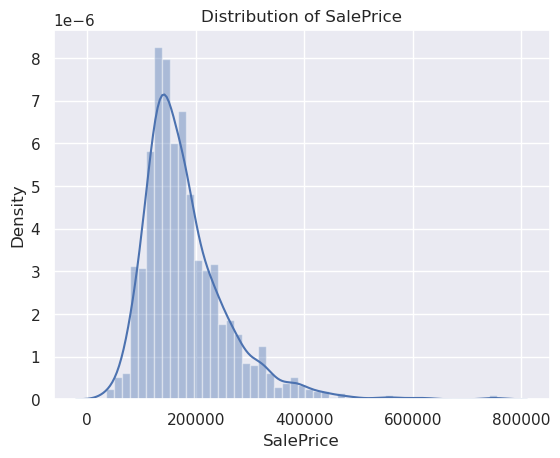

In [11]:
fig, ax = plt.subplots()
sns.distplot(target, ax=ax)
ax.set_title("Distribution of SalePrice")
# skewness and kurtosis
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

To improve performace of the algorithims the data is logged. This reduces the skewness and kurtosis of the target variable. This is important as skewness and high outliers make it hard for the model to accurately predict the target as there are few training examples in those regions. To reduce the skewness of the data the natural log of it is taken. As the results display, this has greatly reduced the skewness of the target variable. 

Skewness: 0.121347
Kurtosis: 0.809519


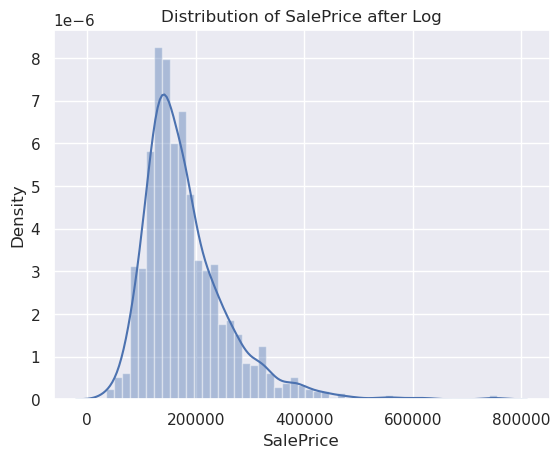

In [12]:
target_log = np.log1p(target)
fig, ax = plt.subplots()
sns.distplot(target, ax=ax)
ax.set_title("Distribution of SalePrice after Log")
# skewness and kurtosis
print("Skewness: %f" % target_log.skew())
print("Kurtosis: %f" % target_log.kurt())

<a id="section-two"></a>
# **2. Regression Models**
Defining them here allows for them to be called throughout the data processing stage, so that one can tell if it improves them or not. The three models chosen are Linear Regresssion, K-Nearest Neighbours and Decisions trees. For Decision Trees the Random Forest Alogorithim was used. For Linear Regression, hyperparameter tuning was done with Ridge, Lasso, Elastic Net. 

<a id="section-two-a"></a>
## **Linear Regression**
Linear Regression is one of the simplest and most popular statistical techniques used in machine learning. It finds the relationship between a dependent variable (labelled the target variable) and the one or more independent variables (known as the predictor variable and labbeled as X_train in this notebook). Once the best-fitting linear equation that describes the relationship is found, it can be used to predict the target variable for unseen data. 

The following function, 'linear_regression', is used to to indicate the perfomance of linear_regression during different stages of the data processing and feature selection. It uses the Normal Equation and not the Gradient Descent for learning the target values from the data features. 

The metric used to determine how well the model is performing is the root mean squared error (RMSE). This was chosen over the R2 metric as it is what the competition score is bassed on. To calculate the RMSE error, square root of the MSE is determined. In order to do this, X_test and t_test are requried to be passed into this function as well. 

In [13]:
def linear_regression(X_train,X_test, t_train, t_test):
    Linear_reg = LinearRegression()
    Linear_reg.fit(X_train, t_train)
    print('Coefficients Linear Regression: ', Linear_reg.intercept_)
    print('Intercept Linear Regression: ', Linear_reg.intercept_)
    t_pred = Linear_reg.predict(X_test)
    rmse = np.sqrt(np.mean((t_pred - t_test)**2))
    print(f"RMSE Linear Regression: {rmse}")
    return rmse

<a id="section-two-b"></a>
## **K-Nearest Neighbours (KNN)**

In this code block, a K-Nearest Neighbors (KNN) regression model is being trained and evaluated using the provided data. KNN is a non-parametric and instance-based learning algorithm that can be used for both regression and classification tasks.

### Model Selection and Training
The function `knn` takes four parameters: the training and testing input features (`X_train`, `X_test`) and the training and testing target values (`t_train`, `t_test`). The scoring metric used for evaluation is the negative mean squared error (`neg_mean_squared_error`), which is a common metric for regression tasks.

A 3-fold cross-validation (`nr_cv = 3`) is used to assess the model's performance on the training data. Grid search is applied to find the best combination of hyperparameters for the KNN model, using the `GridSearchCV` function from the `sklearn` library. The hyperparameters considered in the search are:

- `'n_neighbors'`: The number of nearest neighbors to include in the majority of the voting process. It is set to [3, 4, 5, 6, 7, 10, 15].
- `'weights'`: The weight function used in prediction. It can be either `'uniform'` (all points in each neighborhood are weighted equally) or `'distance'` (weights are assigned based on the inverse of the distance from the query point).
- `'algorithm'`: The algorithm used to compute the nearest neighbors. Options include `'ball_tree'`, `'kd_tree'`, and `'brute'`. These algorithms have different time and space complexities, depending on the data's structure.

### Model Evaluation
Once the best hyperparameters are found, the KNN model is retrained using them, and predictions are made for the test data (`X_test`). The root mean squared error (RMSE) is calculated by comparing the predicted values (`pred_knn`) with the actual target values (`t_test`). The RMSE is then printed and returned by the function. This error metric provides an idea of how well the KNN model performs on the test data. 

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


def knn(X_train, X_test, t_train, t_test):
    score_calc = 'neg_mean_squared_error'
    # setting the number of cross validations used in the Model part 
    nr_cv = 3
    param_grid = {'n_neighbors' : [3,4,5,6,7,10,15] ,    
              'weights' : ['uniform','distance'] ,
              'algorithm' : ['ball_tree', 'kd_tree', 'brute']}
    knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = score_calc)
    knn.fit(X_train, t_train)
    print(knn.best_estimator_)
    pred_knn = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(t_test,pred_knn))
    print("RMSE K-Nearest Neighbours: ", rmse)
    return rmse


<a id="section-two-c"></a>
## **Random Forest**

In this code block, we define a function `random_forest_regression` that trains a RandomForestRegressor model using grid search for hyperparameter optimization. The function takes the training and testing data as input and returns the root mean squared error (RMSE) of the predictions.

1. We import the RandomForestRegressor class from the `sklearn.ensemble` module.

2. Inside the function, we create a RandomForestRegressor instance with a fixed random state (42) to ensure reproducibility of the results.

3. We define a parameter grid for the grid search. The grid includes a combination of hyperparameters to be tested during the search:
    - `n_estimators`: [50, 100] (number of trees in the forest)
    - `max_depth`: [None, 20] (maximum depth of each tree)
    - `min_samples_split`: [2, 5] (minimum number of samples required to split an internal node)
    - `max_features`: ['auto'] (number of features to consider when looking for the best split)

   These hyperparameters were chosen because they are among the most influential in determining the performance of a random forest model.

4. We create a GridSearchCV instance with the RandomForestRegressor, the parameter grid, 5-fold cross-validation, and scoring based on the negative mean squared error. We set `verbose=1` to display the progress of the search and `n_jobs=-1` to use all available CPU cores for parallel computation.

5. We fit the grid search to the training data, which will find the best combination of hyperparameters based on cross-validation.

6. We extract the best hyperparameters found by the grid search and create a new RandomForestRegressor with these parameters.

7. We fit the best random forest model to the training data and calculate the coefficient of determination (R-squared) on the training data to evaluate the model's performance.

8. We make predictions on the test data using the best random forest model and calculate the RMSE, which serves as a measure of the model's performance on unseen data.

9. Finally, we return the RMSE value as the output of the function.


In [15]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regression(X_train, X_test, t_train, t_test):

    rf = RandomForestRegressor(random_state=42)

    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 20],
        'min_samples_split': [2, 5],
        'max_features': ['auto']
    }

    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

    grid_search.fit(X_train, t_train)

    best_params = grid_search.best_params_

    best_rf = RandomForestRegressor(**best_params)
    best_rf.fit(X_train, t_train)

    r_sq = best_rf.score(X_train, t_train)
    print(f"coefficient of determination: {r_sq}")

    t_pred = best_rf.predict(X_test)

    # Calculate the RMSE
    RMSE = np.sqrt(np.mean((t_pred - t_test) ** 2))
    print(f"RMSE: {RMSE}")
    return RMSE
   

<a id="section-two-d"></a>
## **Ridge**
Ordinary Linear Regression does not have any hyperparameters to tune. This is why different regularization models are applied to linear regression which improve performance and allow for a better fit. 

Ridge Regression is also known as L2 regularization. It is used to prevent overfitting of the linear regression. The goal of ridge regression is to shrink coefficients of independent variables twowards zero. The key difference between Ridge Regression and Linear Regression is the addition of a peanlty term to the cost function. The penalty term is proportional to the square of the magnitude of the coefficients and is controlled by the regularization hyperparameter (called alpha in the following code). As the value of lamba increases the coefficients are penalized more heavily. This can lead to a simpler model but also result in potentially higher bias. 

The advantage of Rdige Regression is that it can be applied to a very high-dimensional dataset. As the results from the notebook show, the best RMSE score for Ridge Regression is before the number of features are reduced. 

The ridge_model function created takes in the traning and test data as well as an array of hyperparameters labelled alphas. These hyperparameters are deliberately chosen to cover a large range of values as they are used for both the ridge_model and lasso_model. The function not only records the best alpha to use, but also plots the train and validation error for different hyperparameter values. It does not use a grid search but rather manually itterates through the different alphas and then stores the resulting errors. The error metric used is still the RMSE and is calculated by using the mean_squared_error function and settting 'squared' to be false. 

In [16]:
from sklearn.linear_model import  Ridge
def ridge_model(X_train, t_train, X_val, t_val, alphas):
    train_error = []
    val_error = []
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, t_train)
        t_train_pred = ridge.predict(X_train)
        t_val_pred = ridge.predict(X_val)
        train_rmse = mean_squared_error(t_train, t_train_pred, squared=False)
        val_rmse = mean_squared_error(t_val, t_val_pred, squared=False)
        train_error.append(train_rmse)
        val_error.append(val_rmse)
        
    # Plotting RMSE for different alpha values
    plt.plot(alphas, train_error, label='Training RMSE')
    plt.plot(alphas, val_error, label='Validation RMSE')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.legend()
    plt.title('RMSE vs HyperParameters for Ridge Regression')
    plt.show()
    
    # Print best alpha and corresponding RMSE
    best_alpha = alphas[val_error.index(min(val_error))]
    print("Best alpha For Ridge:", best_alpha)
    print("Ridge best RMSE Testing Value:", min(val_error))
    return min(val_error)

<a id="section-two-e"></a>
## **Lasso**
Lasso regression is a type of linear regression that uses L1 regularization to shrink the coefficients of the regression model towards zero. This technique is used to prevent overfitting and to improve the interpretability of the model. The L1 penalty function used in Lasso regression adds the absolute values of the coefficients to the loss function being optimized, in contrast to the L2 penalty function used in Ridge regression which adds the squared values of the coefficients. As a result, Lasso regression is often used in situations where it is suspected that only a small number of features are relevant to the prediction task, as it tends to drive the coefficients of the irrelevant features to zero, as it the case in this situation. 

Like the Ridge Regression, the Lasso Model works best before feature selection, as Lasso performs feature selection already. 

The lasso_model function created takes in the traning and test data as well as an array of hyperparameters labelled alphas. These hyperparameters are deliberately chosen to cover a large range of values as they are used for both the ridge_model and lasso_model. The function not only records the best alpha to use, but also plots the train and validation error for different hyperparameter values. It does not use a grid search but rather manually itterates through the different alphas and then stores the resulting errors. The error metric used is still the RMSE and is calculated by using the mean_squared_error function and settting 'squared' to be false.

In [17]:
def lasso_model(X_train, t_train, X_val, t_val, alphas):
    train_error = []
    val_error = []
    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, t_train)
        t_train_pred = lasso.predict(X_train)
        t_val_pred = lasso.predict(X_val)
        train_rmse = mean_squared_error(t_train, t_train_pred, squared=False)
        val_rmse = mean_squared_error(t_val, t_val_pred, squared=False)
        train_error.append(train_rmse)
        val_error.append(val_rmse)
      
    # Plotting RMSE for different alpha values
    plt.plot(alphas, train_error, label='Training RMSE')
    plt.plot(alphas, val_error, label='Validation RMSE')
    plt.xlabel('Alpha')
    plt.ylabel('RMSE')
    plt.title('RMSE vs Alpha for Lasso Regression')
    plt.legend()
    plt.show()
    
    # Print best alpha and corresponding RMSE
    best_alpha = alphas[val_error.index(min(val_error))]
    print('Lasso')
    print("Best alpha for Lasso:", best_alpha)
    print("Lasso Best RMSE Testing Value:", min(val_error))
    return min(val_error)


## Further Linear Regression Tuning and Regularization
This is a complex set of functions, and requires a long run time and should only be called when the Ridge and Lasso models get the best RMSE score for the initial Ridge and Lasso models. 

In [18]:
#these functions are required to work out the rmse and the rmse for cross-validation with k-folds
def rmsle(t_test, t_pred):
    return np.sqrt(np.mean((t_pred - t_test)**2))

def cv_rmse(model, X, t):
    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    rmse = np.sqrt(-cross_val_score(model, X, t, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

The following code defines a function Linear_Regularization which performs advanced tuning for Linear Regression. This regularization is more refined than what is done in the Ridge_model and Lasso_model.

The function takes in the dataset all_data. It performs one-hot encoding to transform categorical features in the dataset into binary feature, and then extracts the train and test data.

The train dataset is split into a further train and test sections using the 'train_test_split' function from the sklearn library with a test size of 20%.

Next three types of linear regression models are defined using pipelines, Ridge, Lasso and ElasticNet (which is a combination of Ridge and Lasso). Each Pipepline also includes data normalization using RoboustScaler. RobustScaler was deemed to be more effective than StandardScaler by creating another pipeline for Lasso using StandardScaler. The StandardScaler performed less optimally that the model with RoboustSclaer.

The use of cross-validation using 'KFold' from scikitlearn enhances the model by allowing the model to be tested on multiple subsets of the data. It helps to prevent overfitting to a particular dataset. 

Grid Search is used to find the best hyperparameters for Ridge Regression, Lasso Regression, ElasticNet Regression, and Gradient Boosting Regression models. For each model, a list of hyperparameters is defined - based on the hyperparameter estimated in the other Lasso and Ridge Model functinos. Then, we use Grid Search to evaluate the performance of each combination of hyperparameters and select the best hyperparameters for the model.

The code then prints out the best hyperparameters and the corresponding best score for each model. This allows us to see which model and which set of hyperparameters performed the best. 



In [19]:
def Linear_Regularization (all_data):

    all_data = pd.get_dummies(all_data).reset_index(drop=True)
    X_train = all_data[:train_df.shape[0]]
    X_test = all_data[train_df.shape[0]:]
    y = target
    #split data into training and test sets
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_train, target, test_size=0.2, random_state=42)
    X_train.shape, y_train.shape, X_test.shape, y_test.shape
    
    kfolds_cross_validation = KFold(n_splits=10, shuffle=True, random_state=42)
    
    alphas_ridge = [8.5, 8.6, 8.7, 8.8, 8.9, 9, 9.1, 9.2, 9.3, 9.4, 9.5]
    alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
    alphas_elasticnet = [0.0001,0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]

    ### use grid search to help find best alpha for models
    # setup models
    hyperparametersRidge = {'alpha': alphas_ridge}
    search = GridSearchCV(Ridge(), hyperparametersRidge, cv=kfolds_cross_validation, scoring='neg_root_mean_squared_error', n_jobs=-1)
    search.fit(X_train, y_train)
    ridge_best_alpha = search.best_params_
    print('Ridge Best Alpha:', ridge_best_alpha)
    print('Ridge Best Score:', search.best_score_)

    ## LASSO
    hyperparametersLasso = {'alpha': alphas_lasso}
    search = GridSearchCV(Lasso(), hyperparametersLasso, cv=kfolds_cross_validation, scoring='neg_root_mean_squared_error', n_jobs=-1)
    search.fit(X_train, y_train)
    lasso_best_alpha = search.best_params_
    print('Lasso Best Alpha:', lasso_best_alpha)
    print('Lasso Best Score:', search.best_score_)

    ## ElasticNet
    hyperparametersElasticNet = {'alpha': alphas_elasticnet}
    search = GridSearchCV(ElasticNet(), hyperparametersElasticNet, cv=kfolds_cross_validation, scoring='neg_root_mean_squared_error', n_jobs=-1)
    search.fit(X_train, y_train)
    elasticnet_best_alpha = search.best_params_
    print('ElasticNet Best Alpha:', elasticnet_best_alpha)
    print('ElasticNet Best Score:', search.best_score_)

    ## GradientBoostingRegressor
    hyperparametersGradientBoostingRegressor = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
    search = GridSearchCV(GradientBoostingRegressor(), hyperparametersGradientBoostingRegressor, cv=kfolds_cross_validation, scoring='neg_root_mean_squared_error', n_jobs=-1)
    search.fit(X_train, y_train)
    gradientboostingregressor_best_alpha = search.best_params_
    print('GradientBoostingRegressor Best Alpha:', gradientboostingregressor_best_alpha)
    print('GradientBoostingRegressor Best Score:', search.best_score_)
    

Linear_Regularization_With_RobustScaler is almost identical to Linear_Regularization function, except that it includes scaling the data with RobustScaler. This was chosen over using StandardScaler as it performed better

In [20]:
def Linear_Regularization_With_RobustScaler (all_data):

    all_data = pd.get_dummies(all_data).reset_index(drop=True)
    ## Add robust Scaler
    scaler = RobustScaler()
    all_data = scaler.fit_transform(all_data)
    all_data = pd.DataFrame(all_data)
    X_train = all_data[:train_df.shape[0]]
    X_test = all_data[train_df.shape[0]:]
    y = target
    #split data into training and test sets
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_train, target, test_size=0.2, random_state=42)
    X_train.shape, y_train.shape, X_test.shape, y_test.shape
    
    kfolds_cross_validation = KFold(n_splits=10, shuffle=True, random_state=42)
    
    alphas_ridge = [8.5, 8.6, 8.7, 8.8, 8.9, 9, 9.1, 9.2, 9.3, 9.4, 9.5]
    alphas_lasso = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
    alphas_elasticnet = [0.0001,0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100]

    ### use grid search to help find best alpha for models
    # setup models
    hyperparametersRidge = {'alpha': alphas_ridge}
    search = GridSearchCV(Ridge(), hyperparametersRidge, cv=kfolds_cross_validation, scoring='neg_root_mean_squared_error', n_jobs=-1)
    search.fit(X_train, y_train)
    ridge_best_alpha = search.best_params_
    print('Ridge Best Alpha:', ridge_best_alpha)
    print('Ridge Best Score:', search.best_score_)

    ## LASSO
    hyperparametersLasso = {'alpha': alphas_lasso}
    search = GridSearchCV(Lasso(), hyperparametersLasso, cv=kfolds_cross_validation, scoring='neg_root_mean_squared_error', n_jobs=-1)
    search.fit(X_train, y_train)
    lasso_best_alpha = search.best_params_
    print('Lasso Best Alpha:', lasso_best_alpha)
    print('Lasso Best Score:', search.best_score_)

    ## ElasticNet
    hyperparametersElasticNet = {'alpha': alphas_elasticnet}
    search = GridSearchCV(ElasticNet(), hyperparametersElasticNet, cv=kfolds_cross_validation, scoring='neg_root_mean_squared_error', n_jobs=-1)
    search.fit(X_train, y_train)
    elasticnet_best_alpha = search.best_params_
    print('ElasticNet Best Alpha:', elasticnet_best_alpha)
    print('ElasticNet Best Score:', search.best_score_)

Linear_Regularization_Solution that takes in all_data, RidgeAlpha, LassoAlpha, and ElasticNetAlpha as input arguments. As creates a .csv file as a solution
It preprocesses the all_data by converting categorical variables into numerical variables using one-hot encoding and scaling the data using RobustScaler, as from the previous functions Scaling the data improved the results.

The models are then fitted on the training data (X_train and y). Next, a blending function is defined that combines the predictions from the three models with different weights. The weights used in the blending function are 0.1 for ElasticNet, 0.2 for Lasso, and 0.7 for Ridge regression models. The weights are chosen based on how the models were deemed to have performed. Ideally a grid-search would have been used for this but there was insufficient time. Ridge is weighted heavier as no-warning was given about the model not converging. 

The blend_models_predict function is then used to predict the target variable (SalePrice) on the training set (X_train) and calculate the root mean squared logarithmic error (RMSLE) score. Finally, the blended_score is printed to the console.

In [21]:
def Linear_Regularization_Solution(all_data, RidgeAlpha, LassoAlpha, ElasticNetAlpha):
    all_data = pd.get_dummies(all_data).reset_index(drop=True)
    ## Add robust Scaler
    scaler = RobustScaler()
    all_data = scaler.fit_transform(all_data)
    all_data = pd.DataFrame(all_data)
    X_train = all_data[:train_df.shape[0]]
    X_test = all_data[train_df.shape[0]:]
    y = target

    #set up models
    ridge_model= Ridge(alpha=RidgeAlpha, random_state=42)
    lasso_model = Lasso(alpha=LassoAlpha, random_state=42)
    elasticnet_model = ElasticNet(alpha=ElasticNetAlpha, random_state=42)

    #fit the data
    ridge_model.fit(X_train, y)
    lasso_model.fit(X_train, y)
    elasticnet_model.fit(X_train, y)

    #blend models and get predictions
    # while the coefficients of blending should ideally be done by a gridsearch, there was insufficent time for this
    def blend_models_predict(X):
        return ((0.1 * elasticnet_model.predict(X)) + \
                (0.2 * lasso_model.predict(X)) + \
                (0.7 * ridge_model.predict(X)))
    # get final predictions from the blended model
    blended_score = rmsle(y, blend_models_predict(X_train))
    print('RMSLE score on train data:')
    print(blended_score)

    # turn to .csv file
    y_pred = np.floor(np.expm1(blend_models_predict(X_test)))
    solution = pd.DataFrame({"id":id_num, "SalePrice":y_pred})
    solution.to_csv("blended.csv", index = False)

<a id="section-two-d"></a>
## **Function to run all models**
This function can be called throughout the data processing and feature selection stage, to check if the feature engineering improves or deprecates the training model. 

In [22]:
# defining array to store RMSE scores
rmse_results =[]

In [23]:
def run_models(df, target, rmse_results):
    df = pd.get_dummies(df)
    X_train = df[:train_df.shape[0]]
    X_testFinal = df[train_df.shape[0]:]
    X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X_train, target, test_size=0.2, random_state=2)
    rmse_linear = linear_regression(X_train,X_test, t_train, t_test)
    rmse_knn = knn(X_train,X_test, t_train, t_test)
    rmse_r_forest = random_forest_regression(X_train,X_test, t_train, t_test)
    rmse_linear_ridge = ridge_model(X_train, t_train, X_test, t_test, [0.0001, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100])
    rmse_linear_lasso =lasso_model(X_train, t_train, X_test, t_test, [0.0001, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100])
   
    new_column = [rmse_linear, rmse_knn, rmse_r_forest, rmse_linear_ridge, rmse_linear_lasso]
    rmse_results.append(new_column)
    return rmse_results

<a id="section-three"></a>
# **3. Data Processing**

<a id="section-three-a"></a>
## **Organising Data**

The data in the DataFrames can be broadly categorised by being:

1. Continuous 
2. Ordinal
3. Nominal

Continuous data is defined by values that can take on any value within a range, usually numeric information, like area. Ordinal data can be ordered based on some categorical criteria, but the differences between values are not necessarily equal, however, nominal data is data that is categorical and does not have an inherent order or ranking. The way that data is handled and evaluated changes depending on how it is categorised. Therefore, it is recommended that the dataset is organised based on the abovementioned categories.

In [24]:
# create DataFrame of categorical data
nominal = train_df.select_dtypes(include=['object'])

Thereafter, ordinal data is can usually take on discrete values, usually much smaller than the amount of samples in a dataset (unlike continuous data). Thus, a function that compares whether unique numeric values in a feature are less than a reasonable percentage of the total amount of samples is able to roughly estimate what is categorised by ordinal and continuous data. Any features with unique values less than 5% of the amount of samples is assumed to be ordinal. This is a rough categorization that makes it easier to classify, so it will be fine tuned later on.

In [25]:
# categories can also be discrete numeric values

# function that gets a rough estimate of discrete data
def get_discrete_data(df, threshold_percent=5):
    discrete_df = pd.DataFrame()
    
    for col in df.columns:
        if df[col].dtype != 'object':
            num_unique = df[col].nunique()
            num_total = len(df[col])
            percent_unique = (num_unique / num_total) * 100

            if percent_unique <= threshold_percent:
                discrete_df[col] = df[col]
            
    return discrete_df

In [26]:
# finding discrete numeric categories using a threshold of 5%
ordinal = get_discrete_data(train_df)

In [27]:
# create DataFrame of continuous data
continuous = train_df[[col for col in train_df.columns if col not in nominal.columns and col not in ordinal.columns]]

<a id="section-three-a-1"></a>
## Initial separation into Continuous, Ordinal and Nominal

In [28]:
pd.set_option('display.max_rows', None)
print('\nINITIAL SEPARATION\n')
print('Ordinal\n', list(set(ordinal.columns)), '\n')
print('Nominal\n', list(set(nominal.columns)), '\n')
print('Continuous\n', list(set(continuous.columns)))
pd.set_option('display.max_rows', 10)


INITIAL SEPARATION

Ordinal
 ['BsmtFullBath', 'OverallCond', 'LowQualFinSF', 'KitchenAbvGr', 'Fireplaces', 'PoolArea', 'BedroomAbvGr', 'MoSold', 'HalfBath', 'FullBath', 'GarageCars', '3SsnPorch', 'YearRemodAdd', 'YrSold', 'BsmtHalfBath', 'TotRmsAbvGrd', 'MiscVal', 'MSSubClass', 'OverallQual'] 

Nominal
 ['BsmtQual', 'ExterCond', 'GarageQual', 'GarageCond', 'Foundation', 'Fence', 'CentralAir', 'LandContour', 'SaleCondition', 'SaleType', 'MiscFeature', 'Functional', 'MSZoning', 'Condition1', 'ExterQual', 'Condition2', 'BldgType', 'KitchenQual', 'Electrical', 'PavedDrive', 'Exterior2nd', 'RoofStyle', 'Utilities', 'RoofMatl', 'MasVnrType', 'Heating', 'HouseStyle', 'Street', 'BsmtFinType2', 'PoolQC', 'BsmtCond', 'LotConfig', 'HeatingQC', 'FireplaceQu', 'Alley', 'Neighborhood', 'LotShape', 'Exterior1st', 'BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'LandSlope', 'GarageType'] 

Continuous
 ['BsmtFinSF2', 'BsmtUnfSF', 'LotFrontage', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'MasVnrArea', '1

It was found that the 'LowQualFinSF', '3SsnPorch', 'PoolArea', and 'MiscVal' features were incorrectly categorised as ordinal instaed of continuous. While all can take on any value in a range, it was typically miscategorised because they describe instances where are many 0 values in the data. They are reallocated as:

In [29]:
# Some continuous data left in 'ordinal_categories'
continuous = continuous.join(ordinal[['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']])
ordinal.drop(columns = ['LowQualFinSF','3SsnPorch','PoolArea','MiscVal'], inplace = True)

The misorganising of 'YearBuilt', and 'GarageYrBlt' were due to the fact that, while can only take on discrete values, there are many bin values that  data can take on. They are reallocated as:

In [30]:
# Some discrete data left in 'continuous'
ordinal = ordinal.join(continuous[['YearBuilt', 'GarageYrBlt']])
continuous.drop(columns = ['YearBuilt', 'GarageYrBlt'], inplace = True)

In [31]:
# Some nominal data left in 'ordinal_categories'
nominal = nominal.join(ordinal[['MSSubClass']])
ordinal.drop(columns = ['MSSubClass'], inplace = True)

<a id="section-three-a-2"></a>
## Final separation

In [32]:
# format tables
ordinal.sort_index(axis = 1, inplace=True)
nominal.sort_index(axis = 1, inplace=True)
continuous.sort_index(axis = 1, inplace=True)

pd.set_option('display.max_rows', None)
print('\nFINAL SEPARATION\n')
print('Ordinal\n', list(set(ordinal.columns)), '\n')
print('Nominal\n', list(set(nominal.columns)), '\n')
print('Continuous\n', list(set(continuous.columns)))


FINAL SEPARATION

Ordinal
 ['TotRmsAbvGrd', 'YrSold', 'Fireplaces', 'BsmtFullBath', 'MoSold', 'BedroomAbvGr', 'BsmtHalfBath', 'HalfBath', 'FullBath', 'OverallQual', 'GarageCars', 'GarageYrBlt', 'YearBuilt', 'OverallCond', 'YearRemodAdd', 'KitchenAbvGr'] 

Nominal
 ['BsmtQual', 'ExterCond', 'GarageCond', 'GarageQual', 'Foundation', 'Fence', 'CentralAir', 'LandContour', 'SaleCondition', 'SaleType', 'MiscFeature', 'Functional', 'MSZoning', 'Condition1', 'ExterQual', 'BldgType', 'Condition2', 'KitchenQual', 'Electrical', 'PavedDrive', 'Exterior2nd', 'RoofStyle', 'Utilities', 'MasVnrType', 'RoofMatl', 'Heating', 'HouseStyle', 'Street', 'BsmtFinType2', 'PoolQC', 'FireplaceQu', 'BsmtCond', 'HeatingQC', 'LotConfig', 'Alley', 'Neighborhood', 'LotShape', 'BsmtExposure', 'Exterior1st', 'MSSubClass', 'BsmtFinType1', 'GarageFinish', 'LandSlope', 'GarageType'] 

Continuous
 ['2ndFlrSF', 'GrLivArea', 'TotalBsmtSF', 'EnclosedPorch', 'LowQualFinSF', 'BsmtFinSF2', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea

<a id="section-three-b"></a>
## **Combining Train and Test datasets**
The two datasets were combined so that data processing does not have to be repeated twice. This is also to prevent data leakage which occurs when informaiton from the test set is inadvertently used to influence model training. If feature selection is performed separately on the training and test datasets, the model may learn patterns that are unique to the training data but are not applicable to the test. This would result in a worse algorithim. In addition if the feature selection picked up on patterns only present in the test data this would not be an accurate reflection on how good the algorithim is.

In [33]:
all_data = pd.concat([train_df, test_df], axis=0, sort=False)
all_data = all_data.reset_index(drop=True)
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data.shape

(2919, 79)

<a id="section-three-c"></a>
## **Finding Inter-Feature Dependencies**

In [34]:
all_data = all_data.replace("None", np.nan)

## Identifying and Removing Dependent Columns

The following code block aims to identify and remove columns that are dependent on each other. Keeping dependent columns in the dataset may lead to multicollinearity and adversely affect the performance of regression models.

1. **Estimating Dependent Columns**: We first create an empty DataFrame to store column pairs and their dependency percentages. We then iterate through each column and compare it to all other columns, calculating the percentage of rows in which both columns have zero or NaN values. We store these percentages in the `dependent_df` DataFrame.

2. **Setting a Dependency Threshold**: We set a dependency threshold of 0.99, which means we will consider columns to be dependent if they have a dependency percentage greater than this threshold.

3. **Filtering Dependent Columns**: We filter the `dependent_df` DataFrame to keep only the column pairs with a dependency percentage greater than the threshold. We then store these column pairs in a list called `dependent_columns`.

4. **Dropping Dependent Columns**: The `drop_dependent_cols()` function takes a list of columns to drop as an input. It iterates through each of these columns, and for each column, it finds and removes its dependent columns (with a dependency percentage greater than 0.98) from the dataset.

By removing dependent columns, we reduce multicollinearity, which improves the stability and performance of our regression models.

In [35]:
# find estimate of columns that are dependant on eachother
dependent_df = pd.DataFrame(columns=['Column 1', 'Column 2', 'Percentage'])

# loop through each column and compare to all other columns
for i, col1 in enumerate(all_data.columns):
    for j, col2 in enumerate(all_data.columns[i+1:], start=i+1):
        col1_zero_or_nan = (all_data[col1] == 0) | all_data[col1].isna()
        col2_zero_or_nan = (all_data[col2] == 0) | all_data[col2].isna()
        both_zeros_or_nan = col1_zero_or_nan & col2_zero_or_nan
        either_zero_or_nan = col1_zero_or_nan | col2_zero_or_nan
        percentage = both_zeros_or_nan.sum() / either_zero_or_nan.sum()
        dependent_df = dependent_df.append({'Column 1': col1, 'Column 2': col2, 'Percentage': percentage}, ignore_index=True)

# set a threshold for dependent columns
dependency_threshold = 0.99
dependent_df = dependent_df[dependent_df['Percentage'] > dependency_threshold]
dependent_columns = dependent_df[['Column 1', 'Column 2']].values.tolist()
dependent_df

,Column 1,Column 2,Percentage
1485,Exterior1st,Exterior2nd,1.000000
1596,MasVnrType,MasVnrArea,0.993782
2004,BsmtFinType1,TotalBsmtSF,1.000000
2805,Fireplaces,FireplaceQu,1.000000
2852,GarageType,GarageCars,0.993671
2853,GarageType,GarageArea,0.993671
2871,GarageYrBlt,GarageFinish,1.000000
2872,GarageYrBlt,GarageCars,0.993711
2873,GarageYrBlt,GarageArea,0.993711
2874,GarageYrBlt,GarageQual,1.000000


In [36]:
def drop_dependent_cols(columns_to_drop):
    # find columns that are dependent on columns_to_drop and add them to columns_to_drop
    for col in columns_to_drop:
        dependent_cols = dependent_df[(dependent_df['Column 1'] == col) | (dependent_df['Column 2'] == col)]
        for index, row in dependent_cols.iterrows():
            if row['Percentage'] > 0.98:
                if row['Column 1'] not in columns_to_drop:
                    columns_to_drop.append(row['Column 1'])
                    dependent_cols = dependent_cols.drop(index)
                if row['Column 2'] not in columns_to_drop:
                    columns_to_drop.append(row['Column 2'])
                    dependent_cols = dependent_cols.drop(index)
    return columns_to_drop

<a id="section-three-d"></a>
## **Null Data Handling**

<a id="section-three-d-1"></a>
## Finding features that contain null values

In [37]:
def get_missing_data(df):
    missing_amount = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

    missing_percent.replace(0, np.nan, inplace=True)
    missing_percent.dropna(axis=0, inplace=True)
    missing_percent.sort_values(axis=0, ascending=False, inplace=True)

    missing_amount.replace(0, np.nan, inplace=True)
    missing_amount.dropna(axis=0, inplace=True)
    missing_amount.sort_values(axis=0, ascending=False, inplace=True)
    missing_amount = missing_amount.astype(int)

    missing_data = pd.concat([missing_amount, 100*missing_percent], axis=1, keys=['Amount Missing', 'Percent of total'])
    
    return missing_data

missing_data = get_missing_data(all_data)
missing_data

,Amount Missing,Percent of total
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageQual,159,5.447071
GarageCond,159,5.447071
GarageFinish,159,5.447071


<a id="section-three-d-2"></a>
## Amending errors

In [38]:
# Find missing values for MasVnrArea and MasVnrType
# boolean condition for filtering
cond = (all_data['MasVnrType'].isna() | (all_data['MasVnrType'] == 0)) ^ (all_data['MasVnrArea'].isna() | (all_data['MasVnrArea'] == 0))
# filter the DataFrame
filtered_data = all_data[cond]
filtered_data[['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
624,NaN,288.0
688,BrkFace,0.0
773,NaN,1.0
1230,NaN,1.0
1241,Stone,0.0
1300,NaN,344.0
1334,NaN,312.0
1669,NaN,285.0
2319,BrkFace,0.0
2452,NaN,1.0


In [39]:
# Impute MasVnrArea and MasVnrType values

# Calculate mean MasVnrArea for each non-missing MasVnrType
mean_areas = all_data.groupby('MasVnrType')['MasVnrArea'].mean()

# Iterate over filtered_data and impute missing values
for i, row in filtered_data.iterrows():
    if pd.isna(row['MasVnrType']):
        if all_data.loc[i, 'MasVnrArea'] < 10:
            all_data.loc[i, 'MasVnrArea'] = 0.0
        else:
            # Find non-missing MasVnrType with closest mean MasVnrArea to missing MasVnrArea
            closest_type = mean_areas.index[(mean_areas - row['MasVnrArea']).abs().argmin()]
            # Fill in closest_type for MasVnrType
            all_data.loc[i, 'MasVnrType'] = closest_type
    else:
        # Fill in mean MasVnrArea for corresponding non-missing MasVnrType
        all_data.loc[i, 'MasVnrArea'] = mean_areas[row['MasVnrType']]

all_data.loc[filtered_data.index.tolist()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
624,BrkFace,288.000000
688,BrkFace,261.672355
773,NaN,0.000000
1230,NaN,0.000000
1241,Stone,239.550201
1300,BrkFace,344.000000
1334,BrkFace,312.000000
1669,BrkFace,285.000000
2319,BrkFace,261.672355
2452,NaN,0.000000


In [40]:
# Find missing values for Garages
# Find rows where any column containing "Garage" is populated, but not all columns are populated
garage_cols = [col for col in all_data.columns if 'Garage' in col]
cond = ((all_data[garage_cols].notnull().any(axis=1) | (all_data[garage_cols] != 0).any(axis=1))
        & (all_data[garage_cols].isnull().any(axis=1) | (all_data[garage_cols] == 0).any(axis=1))
        & (all_data[garage_cols][(all_data[garage_cols] != 0) & (all_data[garage_cols].notnull())].any(axis=1)))

# filter the DataFrame
filtered_data = all_data[cond]
# display columns whose names contain 'Garage' for filtered_data
filtered_data[filtered_data.filter(like='Garage').columns.tolist()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2576,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
all_data.at[2126, 'GarageYrBlt'] = all_data.at[2126, 'YearBuilt']
all_data.at[2126, 'GarageFinish'] = 'Unf'
all_data.groupby('OverallQual')['GarageQual'].apply(lambda x: x.mode()[0])

# Remove GarageType in 2576
all_data.loc[2576, 'GarageType'] = np.nan

all_data.loc[filtered_data.index.tolist()][all_data.filter(like='Garage').columns.tolist()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,1910.0,Unf,1.0,360.0,NaN,NaN
2576,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="section-three-d-3"></a>
## Replacing with suitable values

Inspired by work done [in this notebook](https://www.kaggle.com/code/ruthannwright/1-house-prices-solution-top-1/edit)


The following code fills in the missing values for the MSZoning column based on the MSSubClass's mode for MSZoning. And the LotFrontage is also filled in by the mode for the Neighborhood data.  

In [42]:
all_data['MSZoning'] = all_data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

The following data processing was done after carefully examining the dataset. In some cases any missing data should be relaced as 'typical functinality.' Example for the Functional data replace with 'Typ' or Kitchen Quality with 'TA.' Electrical is replaced with the mode as there is no typical value for it and as is it not numeric, a median will not work. 

In [43]:
# Impute missing Functional data
all_data['Functional'] = all_data['Functional'].fillna('Typ')
# Impute missing Electrical data
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0], inplace = True)
# Impute missing KitchenQual data
all_data['KitchenQual'] = all_data['KitchenQual'].fillna("TA")

More missing data values are then filled in with the mode for ordinal data categories 

In [44]:
# Impute missing Exterior1st data
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
# Impute missing Exterior2nd data
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
# Impute missing SaleType data
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [45]:
get_missing_data(all_data)

,Amount Missing,Percent of total
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1761,60.328880
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageType,158,5.412813


As the above table shows, there are still missing values in the code. Here a more generic approcah is taken to deal with the remaining missing data values. If the data is cateogrical (is of type object) then the missing data is filled by 'None'
For any data that takes on a numerica values, the missing data is filled with 0.  

In [46]:
objects = []
for i in all_data.columns:
    if all_data[i].dtype == object:
        objects.append(i)
all_data.update(all_data[objects].fillna('None'))

all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in all_data.columns:
    if all_data[i].dtype in numeric_dtypes:
        numerics.append(i)
all_data.update(all_data[numerics].fillna(0))

In [47]:
get_missing_data(all_data)

,Amount Missing,Percent of total


<a id="section-three-e"></a>
## **Running models before feature selection**

Coefficients Linear Regression:  -417228.79718974174
Intercept Linear Regression:  -417228.79718974174
RMSE Linear Regression: 38062.07998260654
Fitting 3 folds for each of 42 candidates, totalling 126 fits
KNeighborsRegressor(algorithm='ball_tree', n_neighbors=15, weights='distance')
RMSE K-Nearest Neighbours:  47679.642618543716
Fitting 5 folds for each of 8 candidates, totalling 40 fits
coefficient of determination: 0.9758231090529897
RMSE: 28948.133856100412


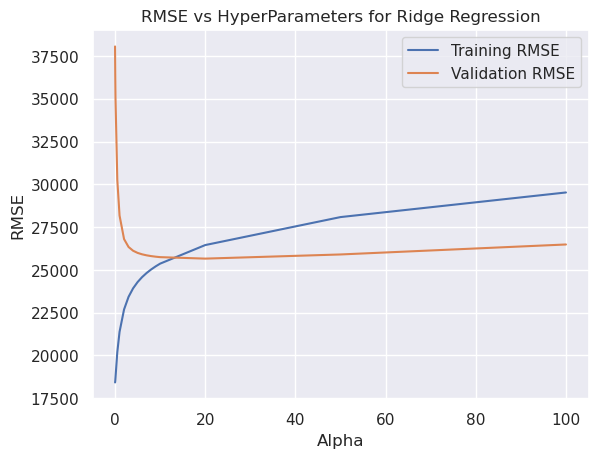

Best alpha For Ridge: 20
Ridge best RMSE Testing Value: 25657.45457080047


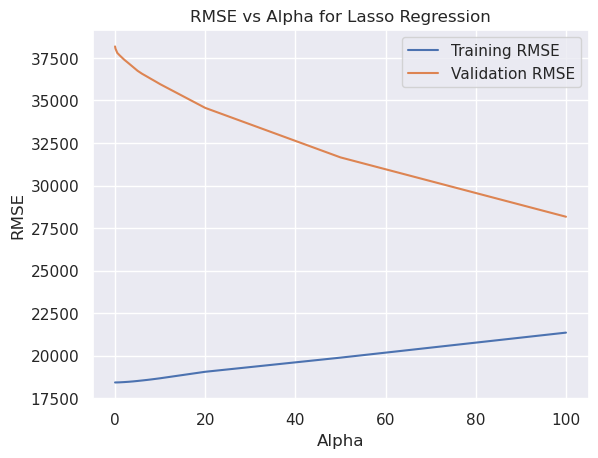

Lasso
Best alpha for Lasso: 100
Lasso Best RMSE Testing Value: 28164.970768437513


In [48]:
rmse_results = run_models(all_data, target, rmse_results)

<a id="section-four"></a>
# **4. Feature Selection**
Inspired by work done [in this notebook](https://github.com/carlosfarfangalindoNL222/Learning-Machine-Learning-with-House_Prices_Challenge/blob/main/Code/House_Price_newest.ipynb)

<a id="section-four-a"></a>
## **Fix the Skewness of the Data**
Fixing skewness by taking the log of numerical data helps to reduce the impact of outliers and helps to normalize the data for better model performance. 

In [49]:
from scipy.stats import skew
#log transform skewed numeric features:
target= np.log1p(target)

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index #get the index of all the numeric features

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness

skewed_feats = skewed_feats[skewed_feats > 0.75] #get the features that are skewed
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

Coefficients Linear Regression:  8.052803444225994
Intercept Linear Regression:  8.052803444225994
RMSE Linear Regression: 0.1496448775814987
Fitting 3 folds for each of 42 candidates, totalling 126 fits
KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, weights='distance')
RMSE K-Nearest Neighbours:  0.26260069985460516
Fitting 5 folds for each of 8 candidates, totalling 40 fits
coefficient of determination: 0.9817531809433329
RMSE: 0.1492082581819609


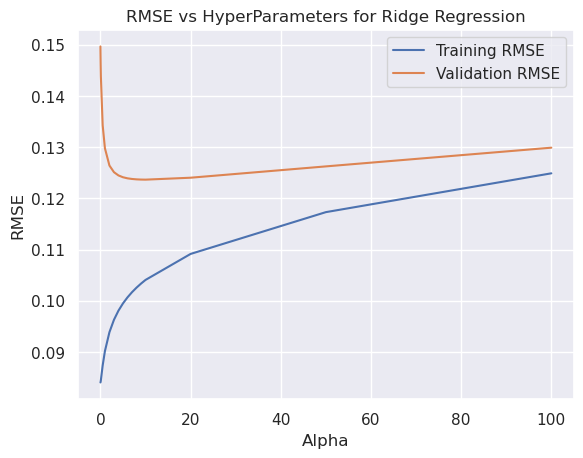

Best alpha For Ridge: 10
Ridge best RMSE Testing Value: 0.12363865635582093


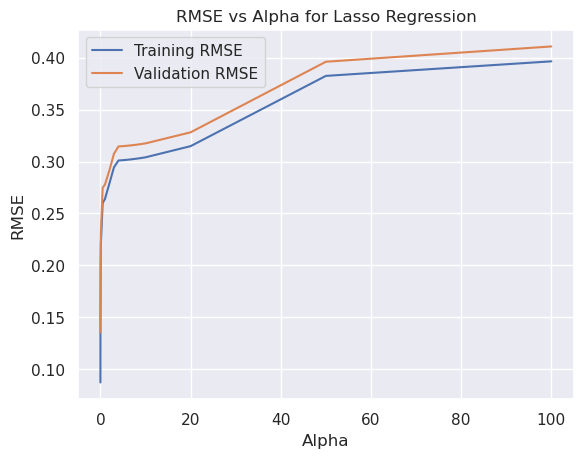

Lasso
Best alpha for Lasso: 0.0001
Lasso Best RMSE Testing Value: 0.1354385612516274


In [50]:
rmse_results = run_models(all_data, target, rmse_results)

<a id="section-four-b"></a>
## **Filtering high-NaN features**
Remove columns with above 85% null values. This improves the data quality as columns with a large proportion of missing values may indicate poor data quality, and including them in the analysis can potentially introduce bias or noise into the results.It also helps improve the computational efficiency of the code and will hopefully improve the model's performance. 

In [51]:
# find columns to drop based on percentage of missing data
missing_data.dropna(inplace=True)
missing_data = missing_data[missing_data['Percent of total'] > 85]
columns_to_drop = missing_data.index.tolist()
columns_to_drop = drop_dependent_cols(columns_to_drop)

all_data = all_data.drop(columns_to_drop, axis=1)
print(f"Dropped {columns_to_drop}.")
print(f"\nRemaining columns: {len(all_data.columns.tolist())}\n")
all_data.shape

Dropped ['PoolQC', 'MiscFeature', 'Alley', 'PoolArea', 'MiscVal'].

Remaining columns: 74



(2919, 74)

Coefficients Linear Regression:  7.073005977382637
Intercept Linear Regression:  7.073005977382637
RMSE Linear Regression: 0.14640863089225378
Fitting 3 folds for each of 42 candidates, totalling 126 fits
KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7, weights='distance')
RMSE K-Nearest Neighbours:  0.2629488228840524
Fitting 5 folds for each of 8 candidates, totalling 40 fits
coefficient of determination: 0.9810364074187041
RMSE: 0.15073470292702237


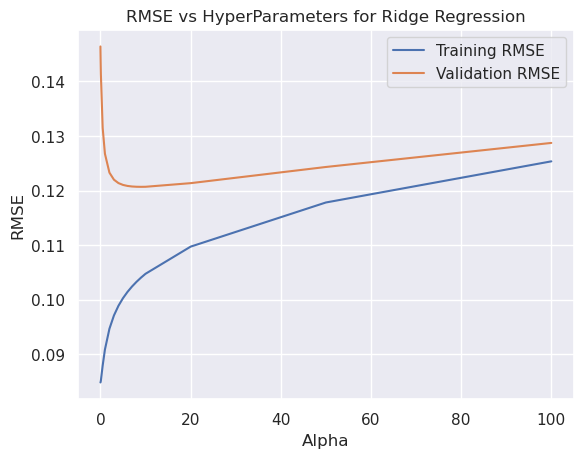

Best alpha For Ridge: 9
Ridge best RMSE Testing Value: 0.12069001303205279


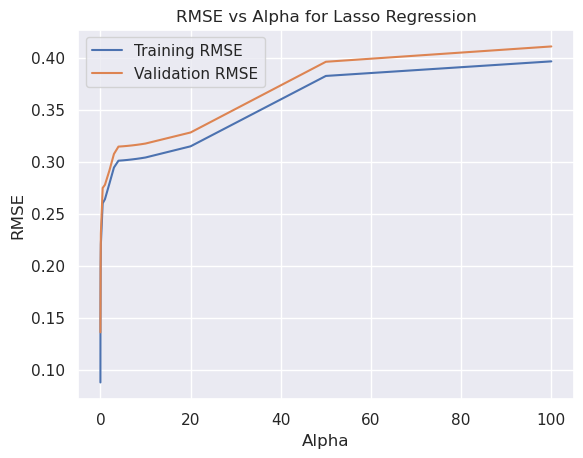

Lasso
Best alpha for Lasso: 0.0001
Lasso Best RMSE Testing Value: 0.13602126915196647


In [52]:
rmse_results = run_models(all_data, target, rmse_results)

<a id="section-four-d-1"></a>
## Adding novel features
Adding new feautres can provide new insight and additional information to the model. It allows for new complex relationships between the data and the target variable to be discovered. However, one does run the risk of adding too many features by adding noise and overfitting. 

The new features added combine features that are linked to each other, by adding new columns for total square footage, total number of batherooms. It then also adds some boolean columns stating if a feature is present or not. This adds more clarity about certain features. 


In [53]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalBathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) + all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))
all_data['TotalPorchSF'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] + all_data['EnclosedPorch'] + all_data['ScreenPorch'] + all_data['WoodDeckSF'])

all_data['Has2ndFloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasGarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasBsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['HasFireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [54]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,YrSold,SaleType,SaleCondition,TotalSF,TotalBathrooms,TotalPorchSF,Has2ndFloor,HasGarage,HasBsmt,HasFireplace
0,60,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,20.257977,3.500000,4.127134,1,1,1,0
1,20,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,2007,WD,Normal,14.282490,2.346574,5.700444,0,1,1,1
2,60,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2008,WD,Normal,20.415959,3.500000,3.761200,1,1,1,1
3,70,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,2006,WD,Abnorml,20.127741,2.000000,9.192991,1,1,1,1
4,60,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,2008,WD,Normal,21.048414,3.500000,9.705341,1,1,1,1


Coefficients Linear Regression:  30362299.72876954
Intercept Linear Regression:  30362299.72876954
RMSE Linear Regression: 212069.5533712149
Fitting 3 folds for each of 42 candidates, totalling 126 fits
KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, weights='distance')
RMSE K-Nearest Neighbours:  0.2596097572285511
Fitting 5 folds for each of 8 candidates, totalling 40 fits
coefficient of determination: 0.9804813616164724
RMSE: 0.15035098265398905


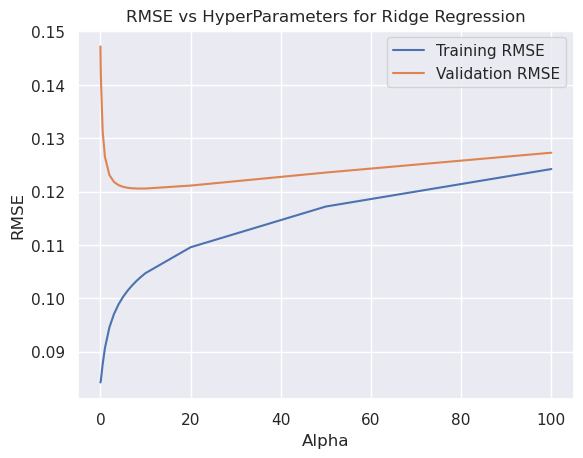

Best alpha For Ridge: 9
Ridge best RMSE Testing Value: 0.12055223880692716


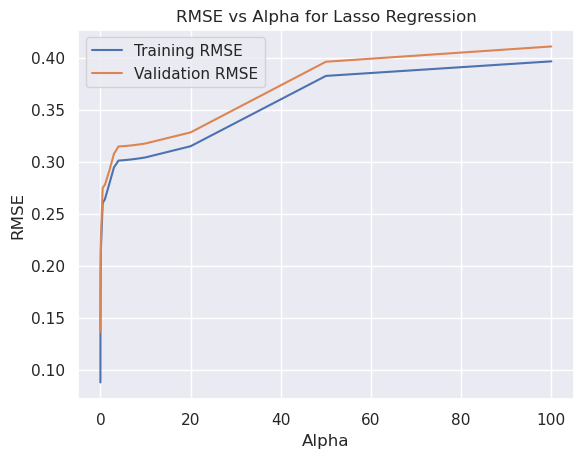

Lasso
Best alpha for Lasso: 0.0001
Lasso Best RMSE Testing Value: 0.136209204654475


In [55]:
rmse_results = run_models(all_data, target, rmse_results)

## Calling Linear Regularization Model
At this point the Lasso and Ridge RMSE are minimal, further reducing the number of features does not improve their scores. Therefore, this is where more indepth linear regularization needs to take place. This includes using grid search, elasticnet and then using a combination of them. RobustScaler is also used which imroves the result. 

Coefficients Linear Regression:  30362299.72876954
Intercept Linear Regression:  30362299.72876954
RMSE Linear Regression: 212069.5533712149
Fitting 3 folds for each of 42 candidates, totalling 126 fits
KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, weights='distance')
RMSE K-Nearest Neighbours:  0.2596097572285511
Fitting 5 folds for each of 8 candidates, totalling 40 fits
coefficient of determination: 0.9810140128408475
RMSE: 0.15291488935963835


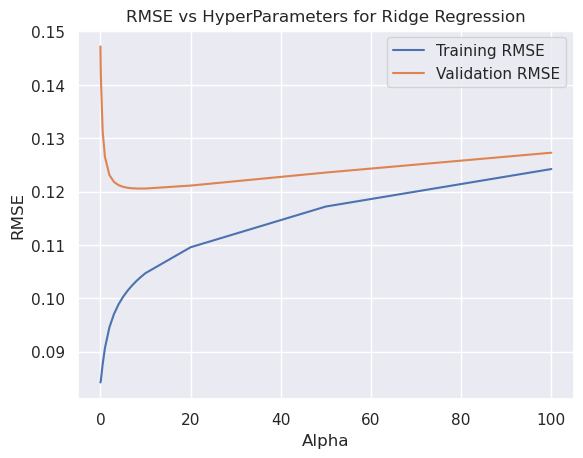

Best alpha For Ridge: 9
Ridge best RMSE Testing Value: 0.12055223880692716


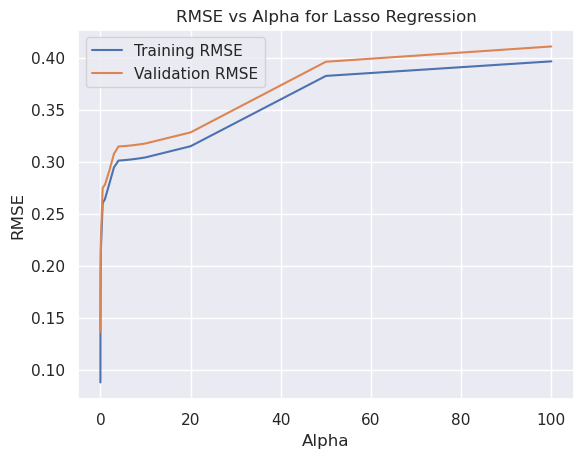

Lasso
Best alpha for Lasso: 0.0001
Lasso Best RMSE Testing Value: 0.136209204654475


In [56]:
rmse_results = run_models(all_data, target, rmse_results)

In [57]:
Linear_Regularization_With_RobustScaler(all_data)

Ridge Best Alpha: {'alpha': 9.5}
Ridge Best Score: -0.12234223185690211
Lasso Best Alpha: {'alpha': 0.0008}
Lasso Best Score: -0.12083785316878441
ElasticNet Best Alpha: {'alpha': 0.001}
ElasticNet Best Score: -0.12127546790939794


In [58]:
Linear_Regularization(all_data)

Ridge Best Alpha: {'alpha': 9.5}
Ridge Best Score: -0.12360705997390113
Lasso Best Alpha: {'alpha': 0.0008}
Lasso Best Score: -0.12061976361365137


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.524e-02, tolerance: 1.548e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.209e-01, tolerance: 1.559e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

ElasticNet Best Alpha: {'alpha': 0.001}
ElasticNet Best Score: -0.12166304989818189
GradientBoostingRegressor Best Alpha: {'n_estimators': 700}
GradientBoostingRegressor Best Score: -0.1254529285836285


<a id="section-four-c"></a>
## **Filtering highly dominated categories**

<a id="section-four-d-2"></a>
## Removing legacy features

In [59]:
all_data.drop([ 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 
               'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'], axis=1, inplace=True)
all_data.shape

(2919, 69)

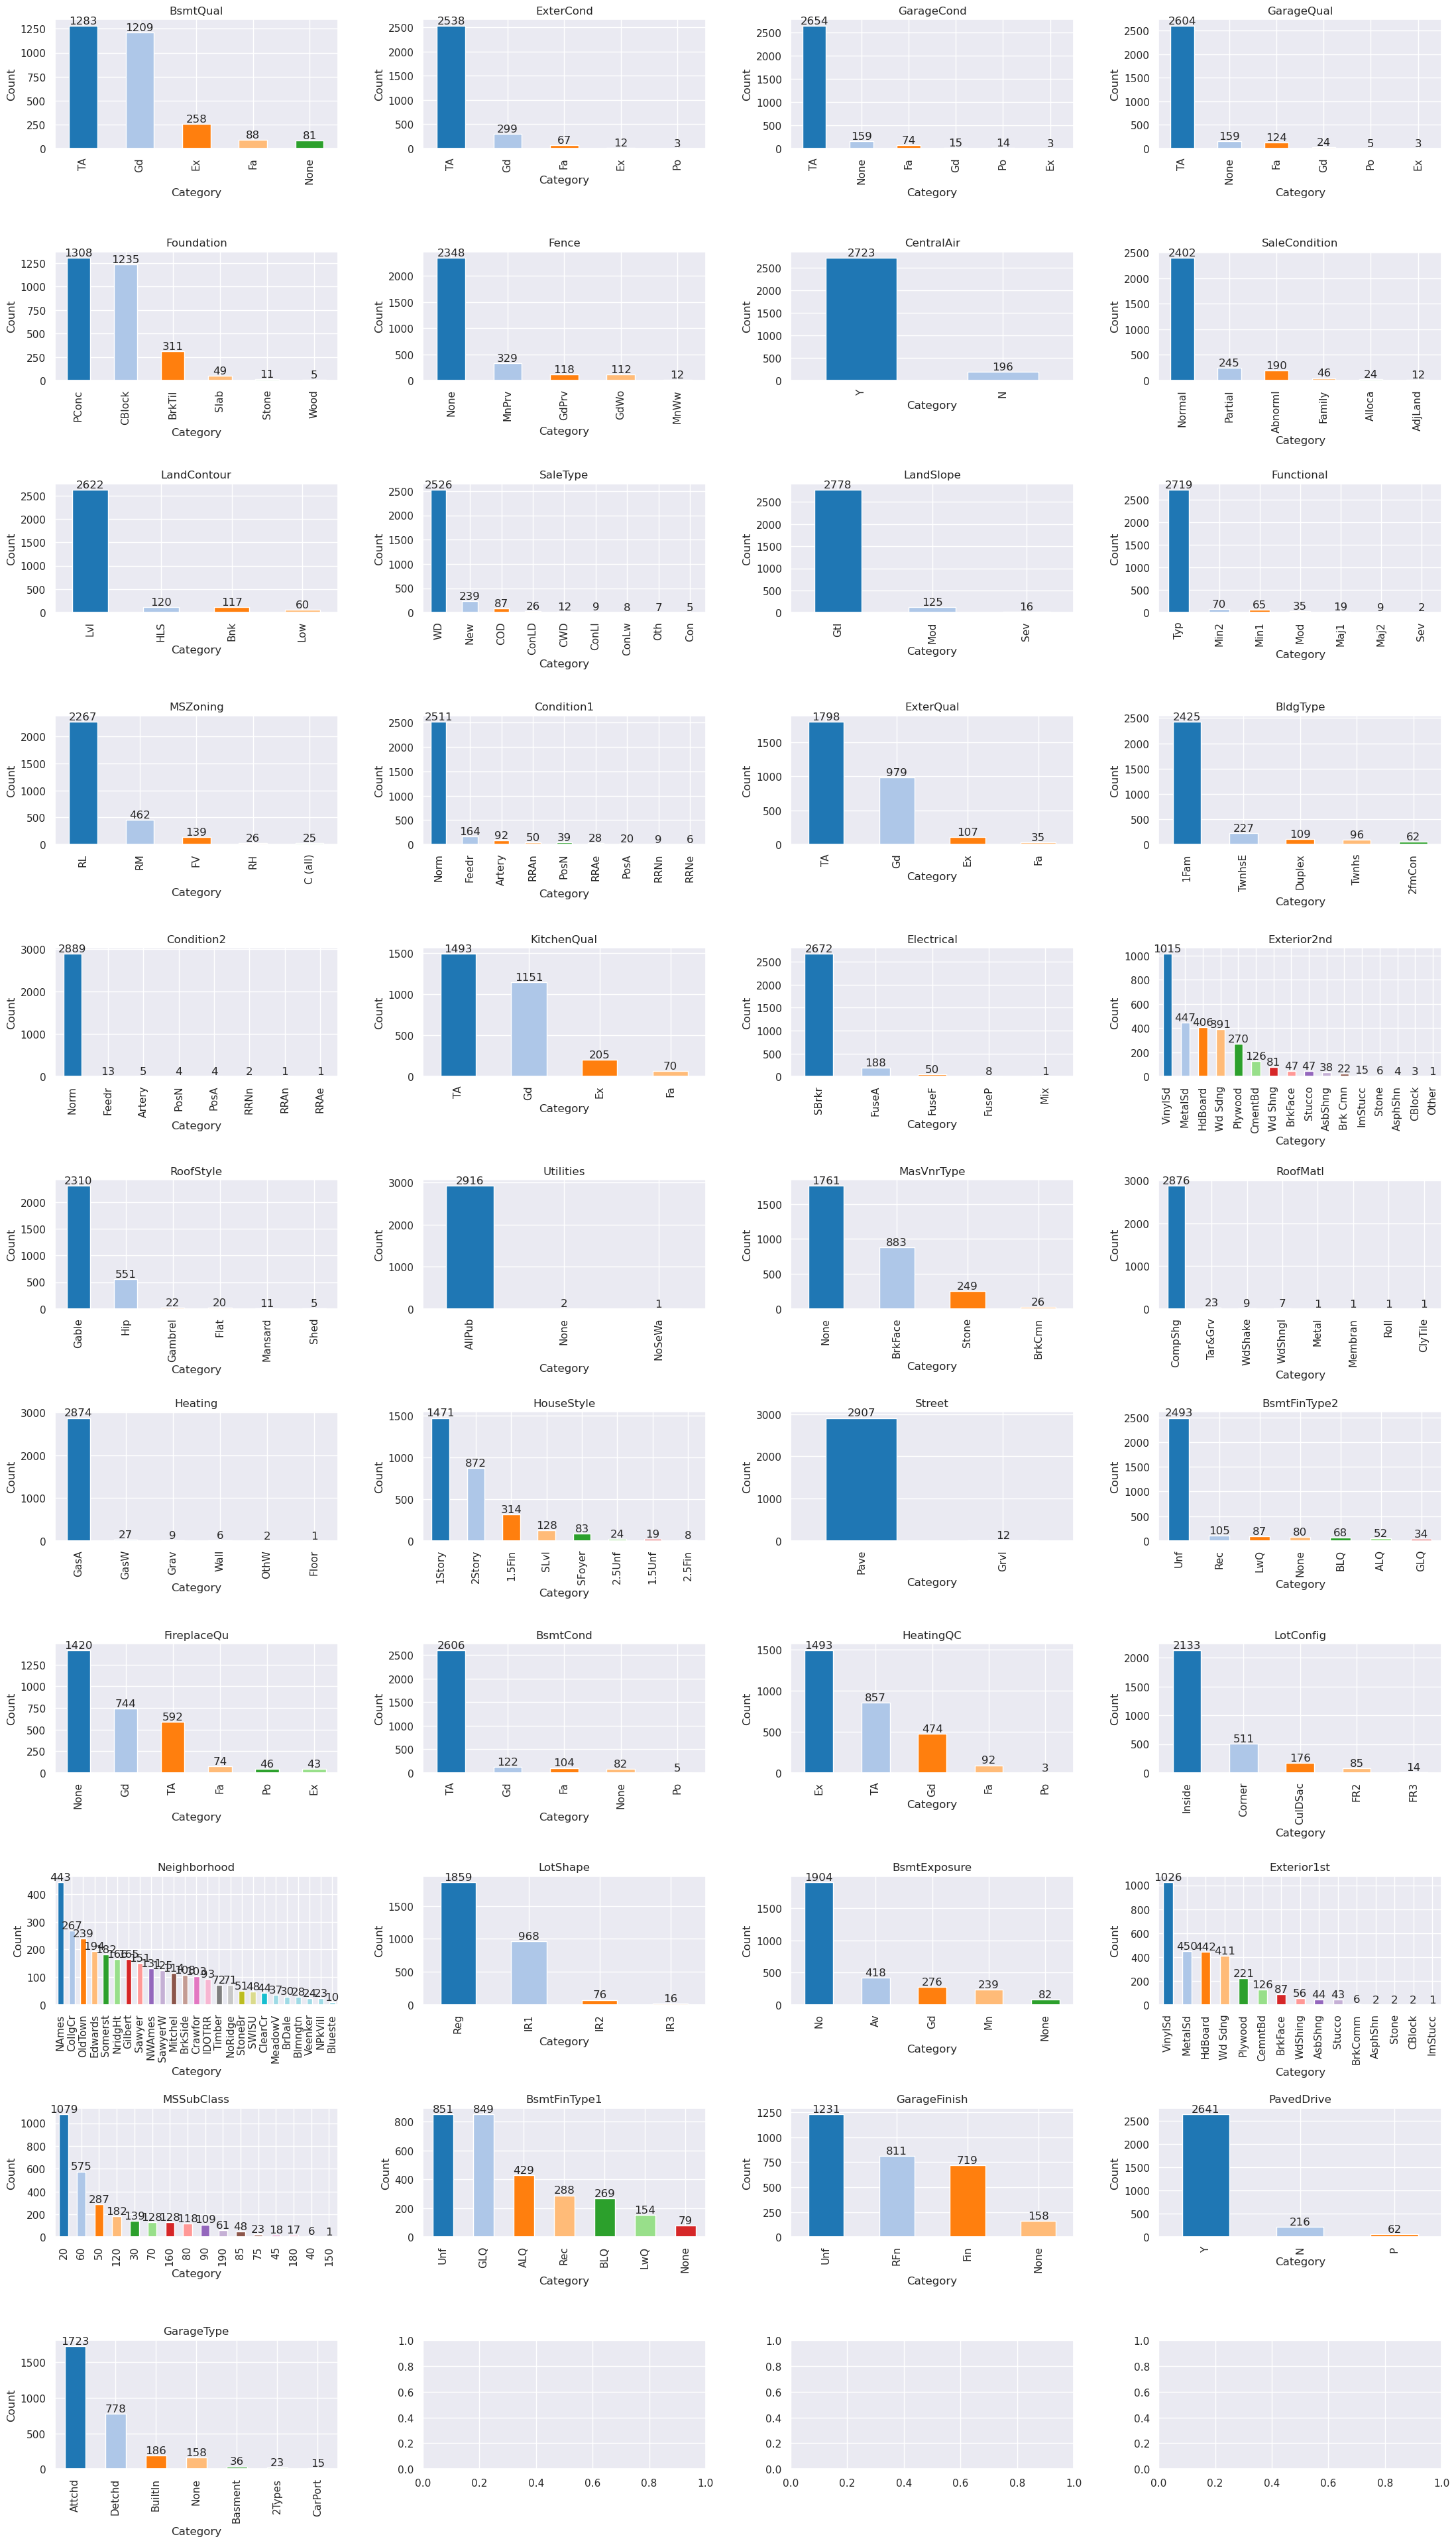

In [60]:
# Replacing NaN with 'None'
common_cols = list(set(nominal.columns) & set(all_data.columns))
all_data[common_cols].replace(np.nan, "None", inplace = True) #is this still needed?? 
nr_rows = np.ceil(len(common_cols) / 4).astype(int)

# create subplots of bar plots for nominal data
fig, axes = plt.subplots(nrows = nr_rows, ncols=4, figsize=(27, 48))

# iterate through each column and create a bar plot
for i, col in enumerate(common_cols):
    # count the number of instances for each category in the column
    counts = all_data[col].value_counts()
    # create a bar plot of the category counts
    colors = plt.cm.tab20(np.arange(len(counts)))
    counts.plot(kind='bar', ax=axes.flat[i] if i < len(nominal.columns) else None, color=colors)
    axes.flat[i].set_title(col)
    axes.flat[i].set_xlabel('Category')
    axes.flat[i].set_ylabel('Count')
    # annotate each bar with its count value
    for j, count in enumerate(counts):
        axes.flat[i].text(j, count, str(count), ha='center', va='bottom')

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.8)

# show the plot
plt.show()

In [61]:
# If one category is more than 98% dominant, drop it from all_data
# create a list to store column names that should be dropped
columns_to_drop = []

# iterate through each column in common_cols
for col in common_cols:
    # count the number of instances for each category in the column
    counts = all_data[col].value_counts(normalize=True)
    # check if any category is more than 95% dominant
    if counts.iloc[0] > 0.98:
        # if so, add the column name to columns_to_drop
        columns_to_drop.append(col)

# drop columns_to_drop from all_data
all_data.drop(columns_to_drop, axis=1, inplace = True)

common_cols = list(set(nominal.columns) & set(all_data.columns))
print(f"Dropped {columns_to_drop}.")
print(f"\nRemaining nominal columns: {len(all_data[common_cols].columns.tolist())}\n")
all_data.shape

Dropped ['Condition2', 'Utilities', 'RoofMatl', 'Heating', 'Street'].

Remaining nominal columns: 36



(2919, 64)

In [62]:
Linear_Regularization_Solution(all_data, 9.5, 0.008, 0.001)

RMSLE score on train data:
0.11031839496766827


<a id="section-four-e"></a>
## **Filtering low-relation features**

<a id="section-four-e-1"></a>
## Low relation categories

## Boxplot Visualization of Categorical Features

We create a boxplot visualization of the relationship between categorical features and the target variable to gain insights into their distribution and potential outliers. The plot is divided into a grid of 7 rows and 5 columns, each containing a boxplot for one categorical feature.

The boxplots help us understand how the categorical features relate to the target variable and reveal potential patterns or irregularities. By inspecting these boxplots, we can make informed decisions about feature selection and preprocessing steps.

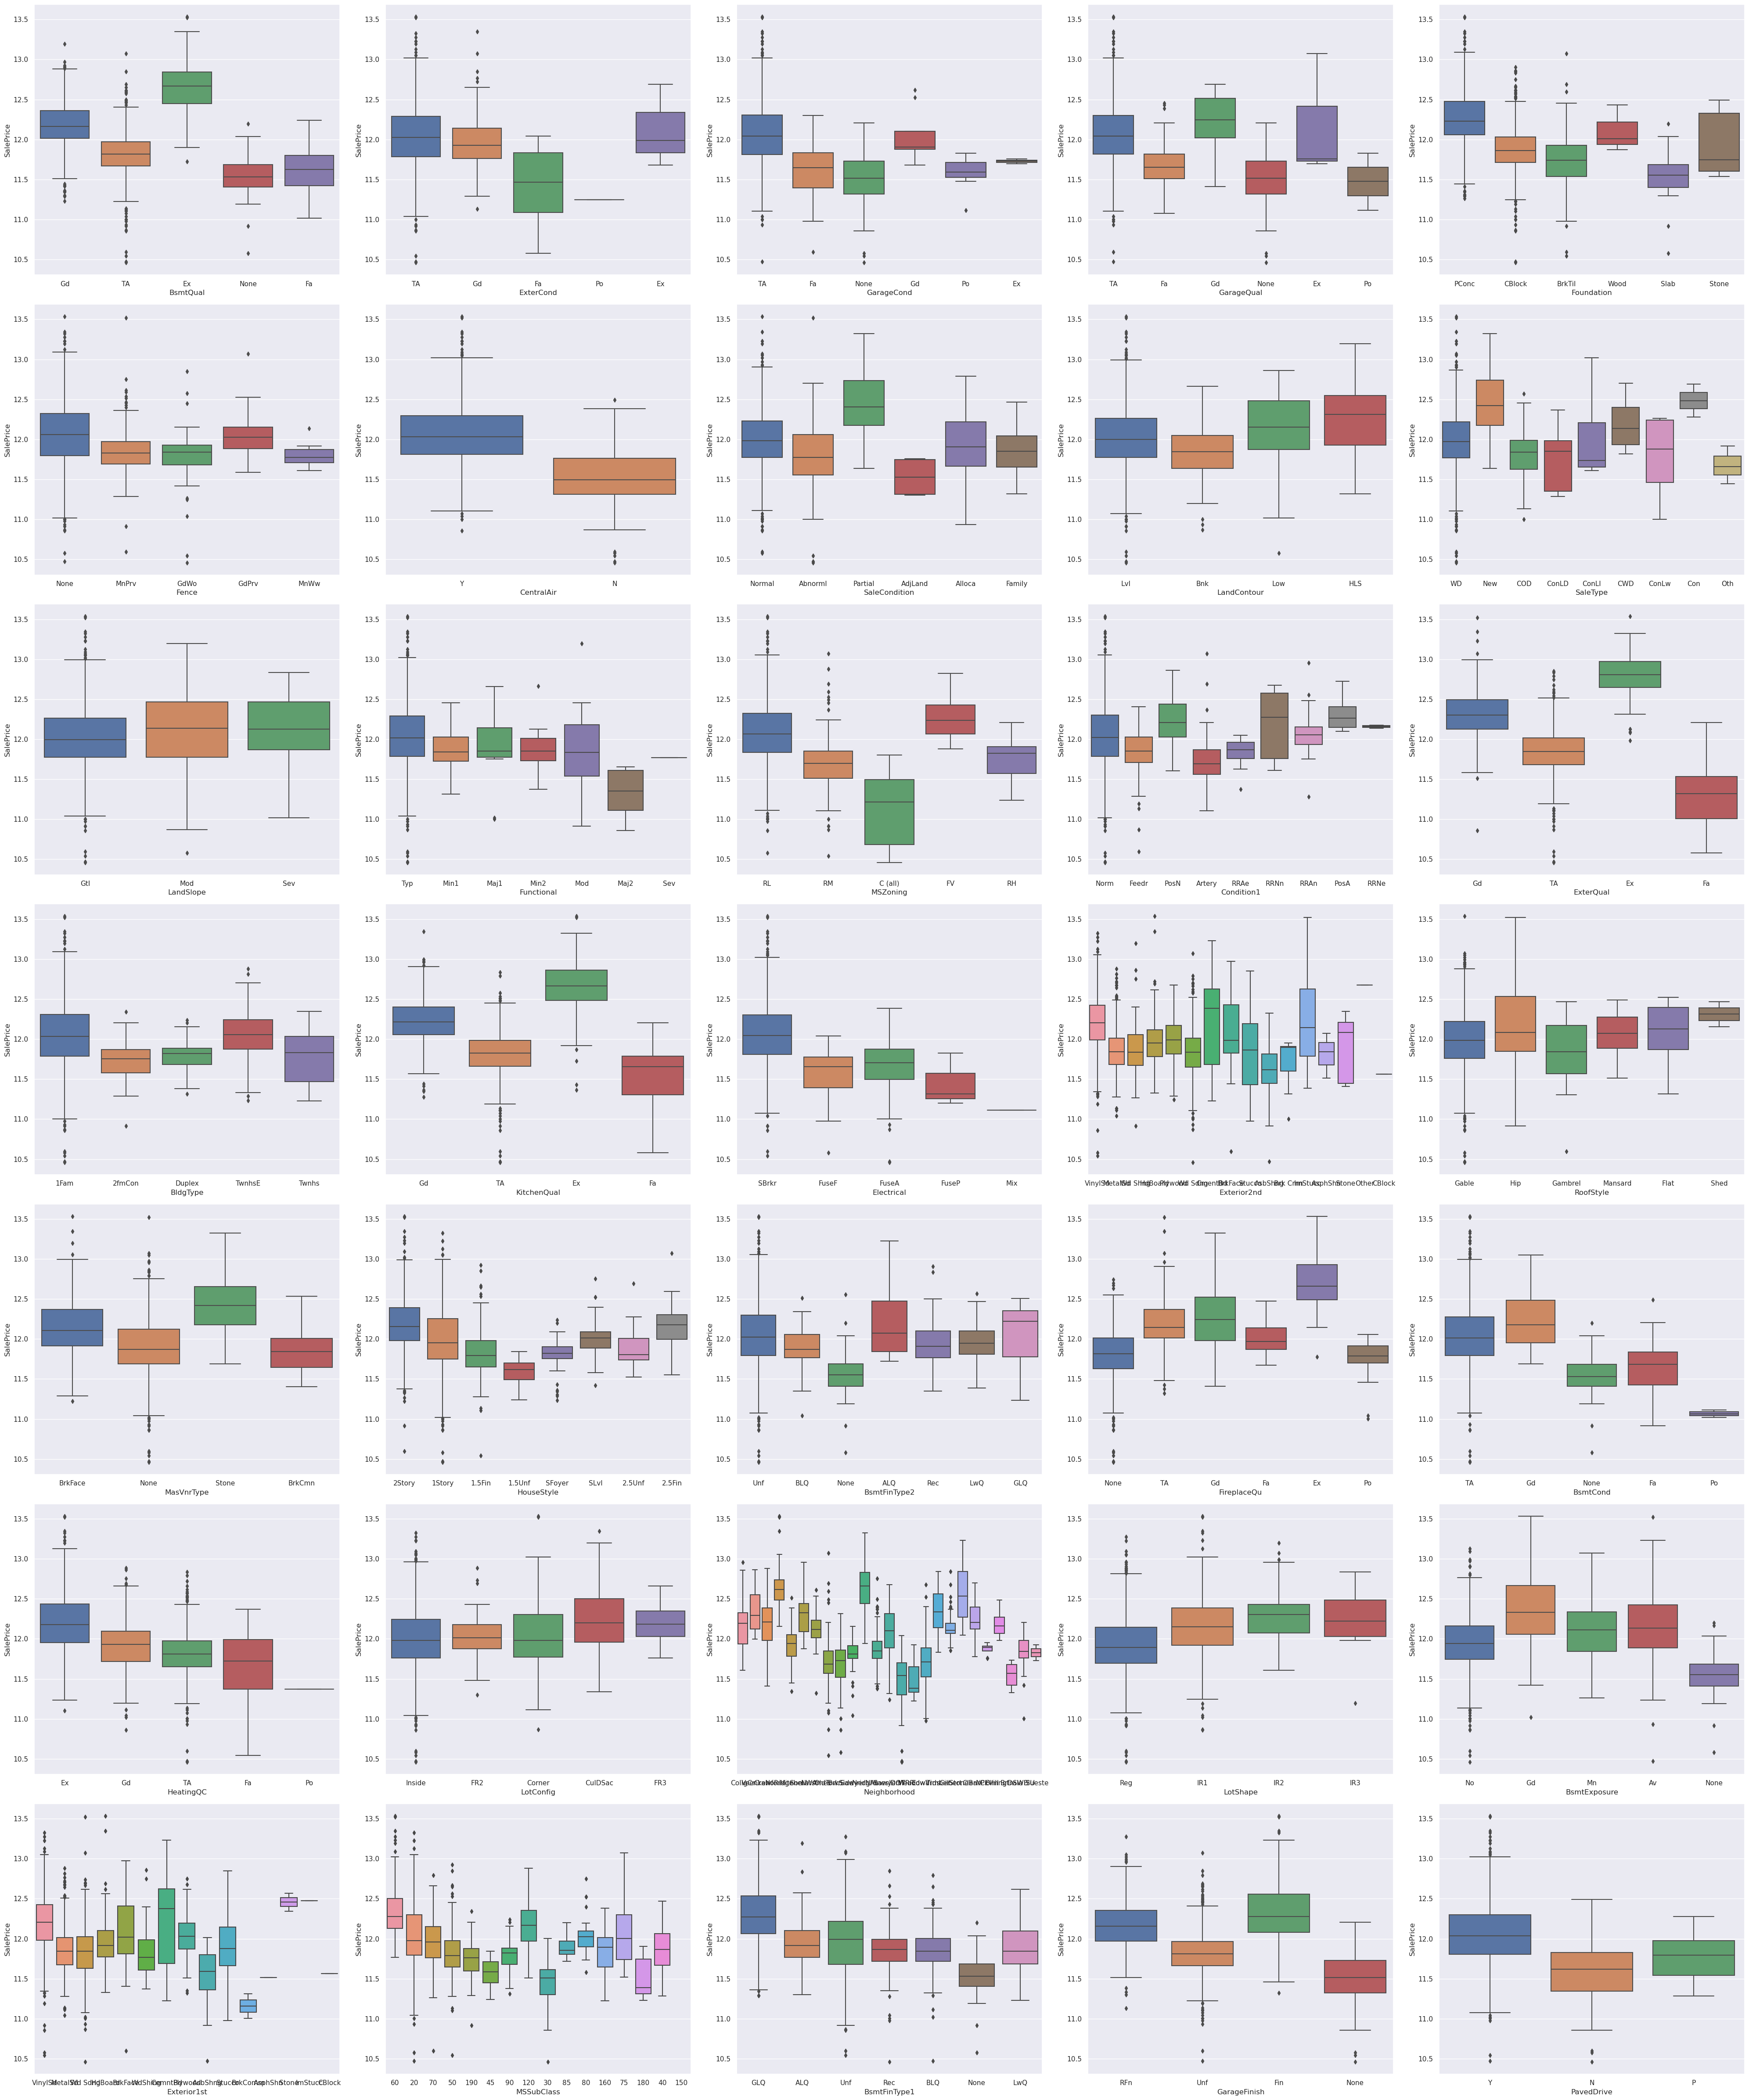

In [63]:
nr_cols = 5
nr_rows = 7
fig, axs = plt.subplots(7, 5, figsize=(40,48))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(common_cols):
            sns.boxplot(x=common_cols[i], y=target, data=all_data, ax = axs[r][c])
            
plt.tight_layout()
plt.show()

## ANOVA Encoding for Categorical Features

We use ANOVA (Analysis of Variance) encoding to encode the categorical features. This method encodes categorical features based on the mean of the target variable for each category. It calculates the F-statistic and the associated p-value, which helps us understand the significance of each categorical feature in predicting the target variable.

We fit the ANOVA encoder on the training dataset and transform the categorical features.


In [64]:
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
import category_encoders as ce
train_temp = all_data[:train_df.shape[0]]
# Encoding using ANOVA
common_cols = list(set(nominal.columns) & set(all_data.columns))
encoder = ce.TargetEncoder(train_temp[common_cols])
encoder.fit(train_temp[common_cols], target_log)
te = encoder.fit_transform(train_temp[common_cols], target_log)

In [65]:
from sklearn.feature_selection import SelectKBest,f_regression 
target_log
anova = SelectKBest(score_func=f_regression, k=30)
anova.fit_transform(te,target_log)

anova_score = pd.DataFrame({'Anova Score':anova.scores_, 'p-Value': anova.pvalues_}, index=common_cols)
anova_score.sort_values(by=['p-Value'], ascending=False)

,Anova Score,p-Value
LandSlope,1.795251,1.804965e-01
Functional,25.581187,4.779839e-07
LotConfig,34.308133,5.804558e-09
LandContour,38.304907,7.848484e-10
Condition1,58.456761,3.749727e-14
BldgType,60.370469,1.473027e-14
RoofStyle,62.488150,5.248017e-15
Fence,62.620892,4.919583e-15
BsmtFinType2,65.301309,1.336255e-15
ExterCond,65.832892,1.032262e-15


## Selecting Strongly Correlated Categorical Features

Using the `SelectKBest` function from the `sklearn.feature_selection` module, we select the top 30 categorical features with the highest F-statistic scores. We store these scores and their corresponding p-values in a DataFrame called `anova_score`, sorted in descending order of p-values.

We then select the categorical features with a p-value less than or equal to 0.01 and an F-statistic score greater than 400 as strongly correlated features. We store these features in a list called `strong_corr_cat`.

In [66]:
strong_corr_cat = list(anova_score[(anova_score['p-Value'] <= 0.01) & (anova_score['Anova Score'] > 400)].index)

print(len(strong_corr_cat))
print(strong_corr_cat)
print('*'*150)

weak_corr_cat= [col for col in common_cols if col not in strong_corr_cat]
print(weak_corr_cat)

11
['BsmtQual', 'Foundation', 'ExterQual', 'KitchenQual', 'FireplaceQu', 'HeatingQC', 'Neighborhood', 'MSSubClass', 'BsmtFinType1', 'GarageFinish', 'GarageType']
******************************************************************************************************************************************************
['ExterCond', 'GarageCond', 'GarageQual', 'Fence', 'CentralAir', 'SaleCondition', 'LandContour', 'SaleType', 'LandSlope', 'Functional', 'MSZoning', 'Condition1', 'BldgType', 'Electrical', 'Exterior2nd', 'RoofStyle', 'MasVnrType', 'HouseStyle', 'BsmtFinType2', 'BsmtCond', 'LotConfig', 'LotShape', 'BsmtExposure', 'Exterior1st', 'PavedDrive']


## Identifying and Dropping Weakly Correlated Categorical Features

We create a list called `columns_to_drop`, which initially contains the weakly correlated categorical features (features not in `strong_corr_cat`). We then use the `drop_dependent_cols()` function to add any dependent columns to this list.

Finally, we drop all the columns in `columns_to_drop` from the dataset and update the `common_cols` list to reflect the remaining nominal columns. This step helps us reduce the dimensionality of our dataset and focus on the most relevant features for our regression models.


In [67]:
# create a list to store column names that should be dropped
columns_to_drop = []
columns_to_drop = weak_corr_cat
columns_to_drop = drop_dependent_cols(columns_to_drop)

all_data.drop(columns_to_drop, axis = 1, inplace = True)

common_cols = list(set(nominal.columns) & set(all_data.columns))
print(f"Dropped {columns_to_drop}.")
print(f"\nRemaining nominal columns: {len(all_data[common_cols].columns.tolist())}\n")
all_data.shape

Dropped ['ExterCond', 'GarageCond', 'GarageQual', 'Fence', 'CentralAir', 'SaleCondition', 'LandContour', 'SaleType', 'LandSlope', 'Functional', 'MSZoning', 'Condition1', 'BldgType', 'Electrical', 'Exterior2nd', 'RoofStyle', 'MasVnrType', 'HouseStyle', 'BsmtFinType2', 'BsmtCond', 'LotConfig', 'LotShape', 'BsmtExposure', 'Exterior1st', 'PavedDrive', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'MasVnrArea', 'GarageType'].

Remaining nominal columns: 9



(2919, 33)

Coefficients Linear Regression:  10.475752138237166
Intercept Linear Regression:  10.475752138237166
RMSE Linear Regression: 0.1280351643654841
Fitting 3 folds for each of 42 candidates, totalling 126 fits
KNeighborsRegressor(algorithm='brute', n_neighbors=6, weights='distance')
RMSE K-Nearest Neighbours:  0.2471059001828695
Fitting 5 folds for each of 8 candidates, totalling 40 fits
coefficient of determination: 0.973802894829274
RMSE: 0.1514292695652065


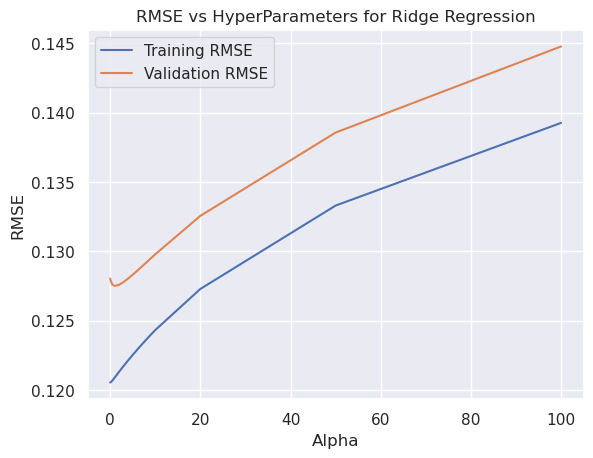

Best alpha For Ridge: 1
Ridge best RMSE Testing Value: 0.12750430832766277


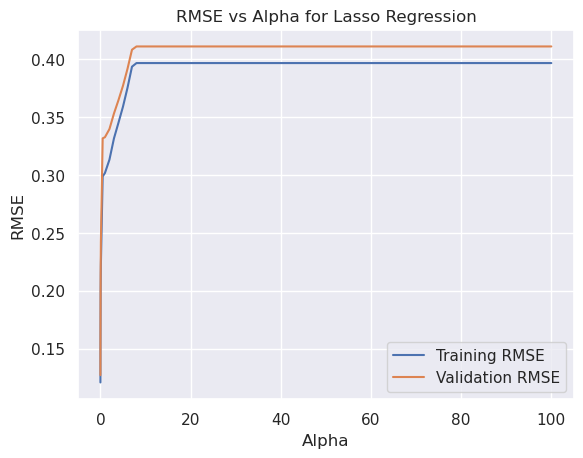

Lasso
Best alpha for Lasso: 0.0001
Lasso Best RMSE Testing Value: 0.12723495400680757


In [68]:
rmse_results = run_models(all_data, target, rmse_results)

<a id="section-four-e-2"></a>
## Low relation numericals

## Scatterplots of Numerical Features and Target

We create scatterplots of the relationship between numerical features (continuous and ordinal) and the target variable to gain insights into their distribution, potential patterns, and outliers. The plot is divided into a grid of 5 rows and 4 columns, each containing a scatterplot for one numerical feature. We also calculate the Pearson correlation coefficient (r) for each feature and display it in the plot title.

The scatterplots help us understand how the numerical features relate to the target variable and reveal potential linear or non-linear relationships. By inspecting these scatterplots, we can make informed decisions about feature selection and preprocessing steps.

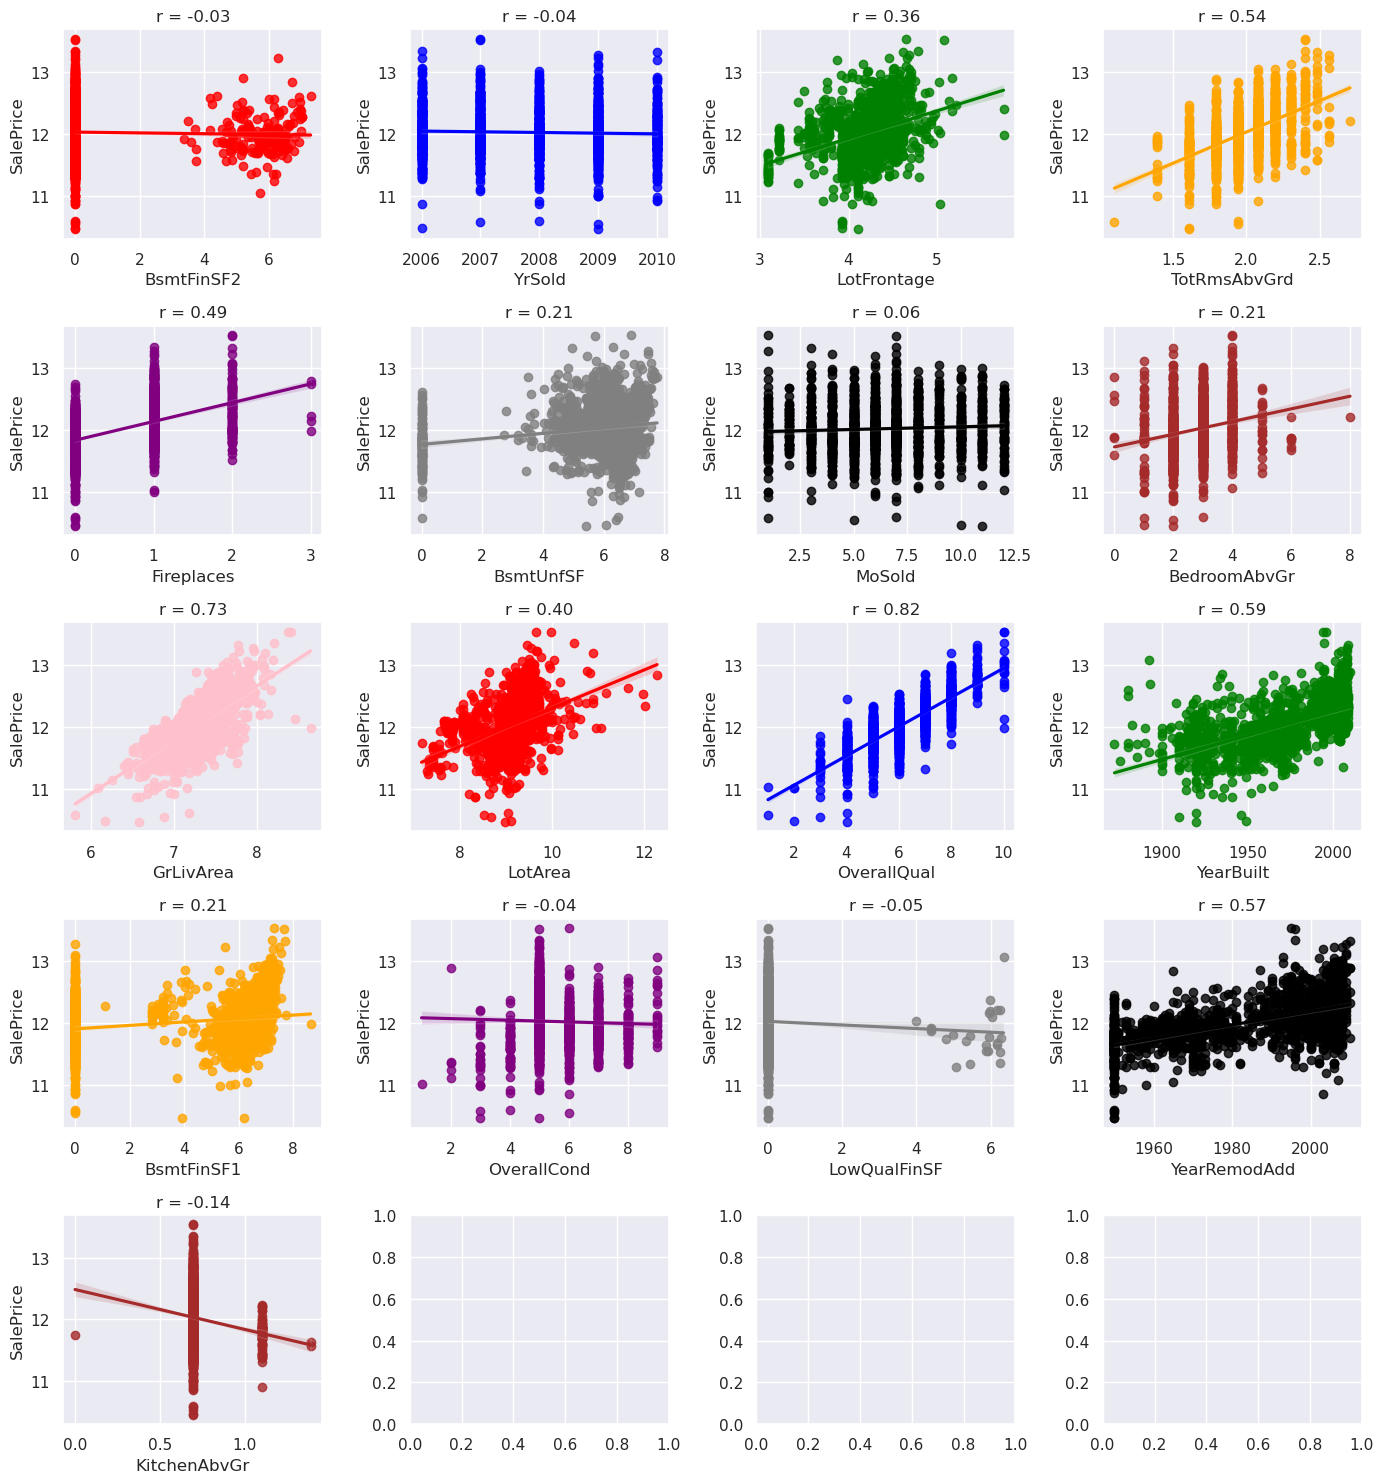

In [69]:
plot_row = 5
plot_col = 4
train_temp = all_data[:train_df.shape[0]]

# create a list to store column names that should be dropped
columns_to_drop = []

fig, axs = plt.subplots(plot_row, plot_col, figsize=(plot_col*3.5,plot_row*3))
# Create a list of all numerical features
common_cols = list((set(continuous.columns) | set(ordinal.columns)) & set(all_data.columns))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray', 'black', 'brown', 'pink']

# Define threshold for absolute r-values to keep
r_threshold = 0.1

for r in range(0,plot_row):
    for c in range(0,plot_col):
        sub_plot = r*plot_col+c
        if sub_plot < len(common_cols):
            x = train_temp[common_cols[sub_plot]]
            y = target
            stp = stats.pearsonr(x, y)
            sns.regplot(x=x, y=y, color=colors[sub_plot % len(colors)], ax=axs[r][c])
            str_title = "r = " + "{0:.2f}".format(stp[0])
            axs[r][c].set_title(str_title, fontsize=12)
            if abs(stp[0]) <= r_threshold:
                columns_to_drop.append(common_cols[sub_plot])

plt.tight_layout()
plt.show()

## Identifying and Dropping Weakly Correlated Numerical Features

We define a threshold for the absolute Pearson correlation coefficient (r-value) of 0.1. If a feature has an absolute r-value below this threshold, we consider it weakly correlated and add it to the `columns_to_drop` list.

We then remove 'OverallCond' from `columns_to_drop` because it is an important feature that we want to keep. We also use the `drop_dependent_cols()` function to add any dependent columns to this list.

Finally, we drop all the columns in `columns_to_drop` from the dataset and update the `common_cols` list to reflect the remaining numerical columns. This step helps us reduce the dimensionality of our dataset and focus on the most relevant features for our regression models.

In [70]:
columns_to_drop.remove('OverallCond')
columns_to_drop = drop_dependent_cols(columns_to_drop)
all_data.drop(columns_to_drop, axis = 1, inplace = True)

common_cols = list((set(continuous.columns) | set(ordinal.columns)) & set(all_data.columns))
print(f"Dropped {columns_to_drop}.")
print(f"\nRemaining numerical columns: {len(all_data[common_cols].columns.tolist())}\n")
all_data.shape

Dropped ['BsmtFinSF2', 'YrSold', 'MoSold', 'LowQualFinSF'].

Remaining numerical columns: 13



(2919, 29)

Coefficients Linear Regression:  1.2918330848838728
Intercept Linear Regression:  1.2918330848838728
RMSE Linear Regression: 0.12723683330085156
Fitting 3 folds for each of 42 candidates, totalling 126 fits
KNeighborsRegressor(algorithm='brute', n_neighbors=7, weights='distance')
RMSE K-Nearest Neighbours:  0.23979325600813595
Fitting 5 folds for each of 8 candidates, totalling 40 fits
coefficient of determination: 0.9803638148118256
RMSE: 0.1461356345401392


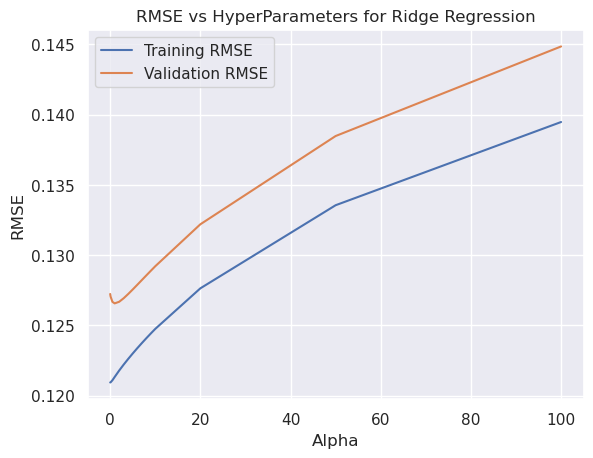

Best alpha For Ridge: 1
Ridge best RMSE Testing Value: 0.12656867051344334


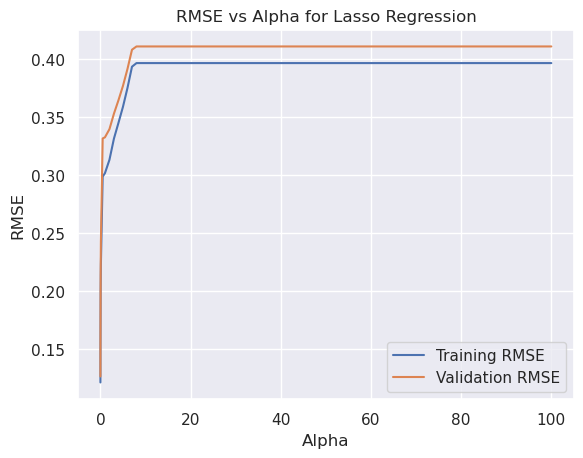

Lasso
Best alpha for Lasso: 0.0001
Lasso Best RMSE Testing Value: 0.12647035870983858


In [71]:
rmse_results = run_models(all_data, target, rmse_results)

<a id="section-four-f"></a>
## **Filtering multicollinear features**

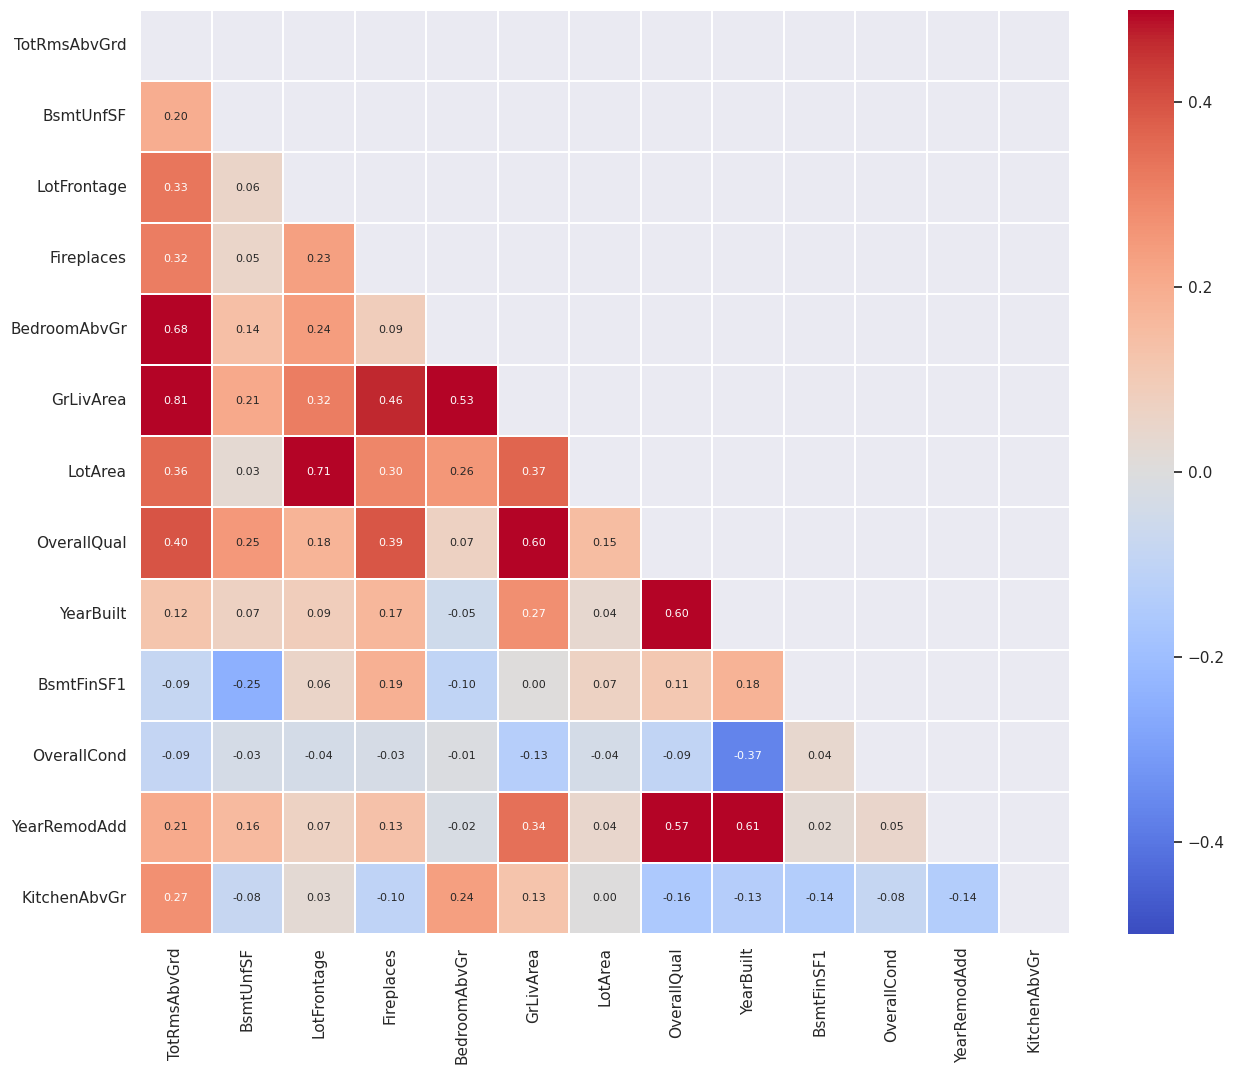

In [72]:
# create a list of columns present in both train_data and continuous
common_cols = list(set(all_data.columns) & (set(continuous.columns) | set(ordinal.columns)))

# select only common columns in train_data
train_data_common = all_data[common_cols]

# compute the correlation matrix
heatmap_data = train_data_common.corr()

# create a mask to only show the lower triangle
mask = np.zeros_like(heatmap_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 12))

# create a heatmap
sns.heatmap(heatmap_data, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.05, 
            annot_kws={"size": 8}, vmin=-0.5, vmax=0.5, center=0)

# rotate the x-axis labels
plt.xticks(rotation=90)

# show the plot
plt.show()

In [73]:
correlation = all_data[common_cols].corr()
corr_threshold = 0.65
highly_corr = correlation[(correlation.abs() > corr_threshold) & (correlation != 1)].stack().reset_index()
highly_corr.columns = ['Column 1', 'Column 2', 'Correlation']

index_to_remove = []

highly_corr.drop(axis=0,index = index_to_remove , inplace =True)
print("Highly correlated columns:")
print(highly_corr)

Highly correlated columns:
       Column 1      Column 2  Correlation
0  TotRmsAbvGrd  BedroomAbvGr     0.676299
1  TotRmsAbvGrd     GrLivArea     0.810082
2   LotFrontage       LotArea     0.712088
3  BedroomAbvGr  TotRmsAbvGrd     0.676299
4     GrLivArea  TotRmsAbvGrd     0.810082
5       LotArea   LotFrontage     0.712088


In [74]:
saleCorrelation = all_data[common_cols].corrwith(target)

less_corr_cols = []
for i, row in highly_corr.iterrows():
    if(saleCorrelation[row[0]]> saleCorrelation[row[1]]):
        less_corr_cols.append(row[1])
    else:
        less_corr_cols.append(row[0])
print("Columns less correlated to SalePrice:")
print(less_corr_cols)
columns_to_drop = list(set(less_corr_cols))

Columns less correlated to SalePrice:
['BedroomAbvGr', 'TotRmsAbvGrd', 'LotFrontage', 'BedroomAbvGr', 'TotRmsAbvGrd', 'LotFrontage']


In [75]:
columns_to_drop = drop_dependent_cols(columns_to_drop)

all_data.drop(columns_to_drop, axis = 1, inplace = True)

common_cols = list((set(continuous.columns) | set(ordinal.columns)) & set(all_data.columns))
print(f"Dropped {columns_to_drop}.")
print(f"\nRemaining numerical columns: {len(all_data[common_cols].columns.tolist())}\n")
all_data.shape

Dropped ['TotRmsAbvGrd', 'BedroomAbvGr', 'LotFrontage'].

Remaining numerical columns: 10



(2919, 26)

Coefficients Linear Regression:  1.1809993929547478
Intercept Linear Regression:  1.1809993929547478
RMSE Linear Regression: 0.12702053968282803
Fitting 3 folds for each of 42 candidates, totalling 126 fits
KNeighborsRegressor(algorithm='brute', n_neighbors=7, weights='distance')
RMSE K-Nearest Neighbours:  0.2426709187770192
Fitting 5 folds for each of 8 candidates, totalling 40 fits
coefficient of determination: 0.9750194078452795
RMSE: 0.1482272167320475


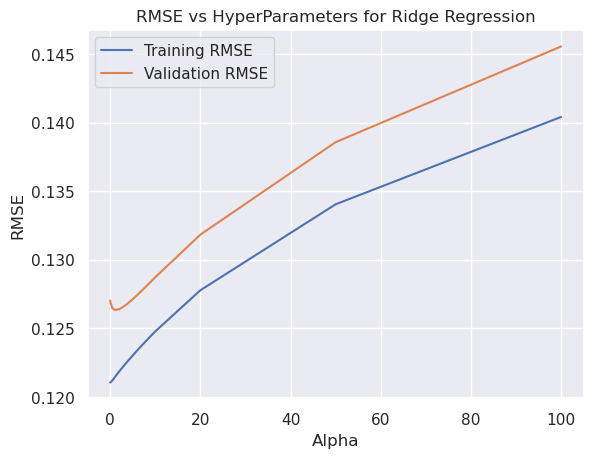

Best alpha For Ridge: 1
Ridge best RMSE Testing Value: 0.1263431928799054


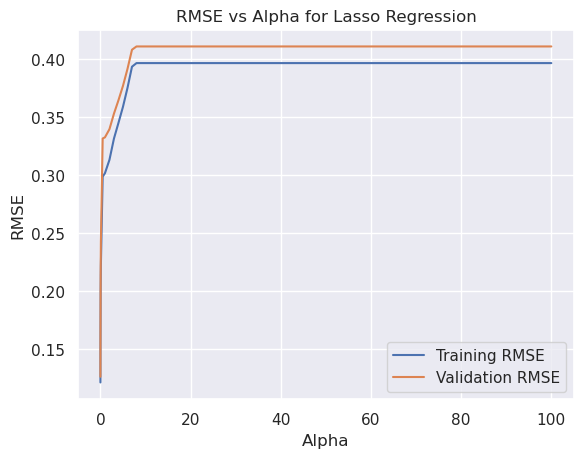

Lasso
Best alpha for Lasso: 0.0001
Lasso Best RMSE Testing Value: 0.12631650886511872


In [76]:
rmse_results = run_models(all_data, target, rmse_results)

<a id="section-five"></a>
# **5. Results**

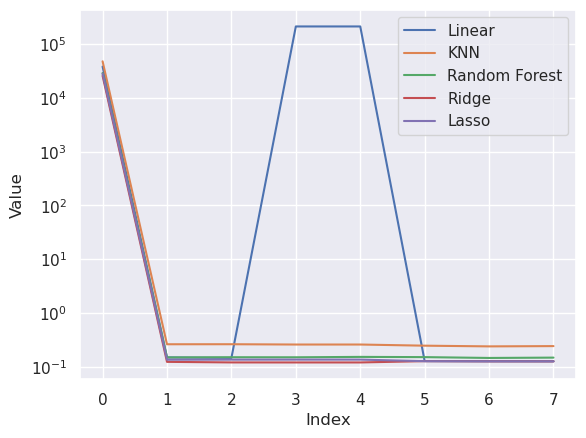

[[38062.07998260654, 47679.642618543716, 28948.133856100412, 25657.45457080047, 28164.970768437513], [0.1496448775814987, 0.26260069985460516, 0.1492082581819609, 0.12363865635582093, 0.1354385612516274], [0.14640863089225378, 0.2629488228840524, 0.15073470292702237, 0.12069001303205279, 0.13602126915196647], [212069.5533712149, 0.2596097572285511, 0.15035098265398905, 0.12055223880692716, 0.136209204654475], [212069.5533712149, 0.2596097572285511, 0.15291488935963835, 0.12055223880692716, 0.136209204654475], [0.1280351643654841, 0.2471059001828695, 0.1514292695652065, 0.12750430832766277, 0.12723495400680757], [0.12723683330085156, 0.23979325600813595, 0.1461356345401392, 0.12656867051344334, 0.12647035870983858], [0.12702053968282803, 0.2426709187770192, 0.1482272167320475, 0.1263431928799054, 0.12631650886511872]]


In [77]:
def plot_RMSE(results):

    array = results
    # Create a list of x values from 1 to the number of data points
    x = range(len(array))

    # plot each sublist as a separate line
    for i in range(len(array[0])):
        plt.plot(x, [sublist[i] for sublist in array])

    # add legend and axis labels
    plt.legend(labels=["Linear","KNN","Random Forest", "Ridge", "Lasso"])
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.yscale('log') # set y-axis to log scale

    # show plot
    plt.show()

plot_RMSE(rmse_results)
print(rmse_results)

## In-depth Analysis of Results

The results contain the RMSE values for each model at different stages of the feature engineering process. The models used are Linear Regression, KNN, Random Forest, Ridge, and Lasso. The feature engineering processes are applied in the following order:

1. No feature selection
2. Fixing skewness
3. Filtering high NaN features
4. Filtering dominant categories
5. Feature addition and removal of legacy features
6. Filtering low relation categories and low correlated numerical features
7. Filtering multicollinear features

### No feature selection

This is the baseline model with all the features, and it serves as a reference point for the subsequent feature engineering processes. The models have varying RMSE values, with the Random Forest model performing the best and KNN performing the worst.

### Fixing skewness

Skewed features can cause problems for certain models, particularly linear regression models, which assume normality in the distribution of the data. This step involves transforming skewed features to improve the normality of their distributions. Most of the models show an improvement in their RMSE values. The transformation helps the models better capture the relationships between features and the target variable.

### Filtering high NaN features

Removing features with a high proportion of missing values can reduce noise and dimensionality in the data, allowing models to focus on more relevant features. This step results in a slight improvement for most models, except for KNN, which has a slight increase in RMSE.

### Filtering dominant categories

Removing features with a dominant category can improve the performance of models that are sensitive to multicollinearity, such as Ridge and Lasso regression models. This step improves the performance of the Ridge and Lasso models, while it slightly worsens the performance of the other models.

### Feature addition and removal of legacy features

The addition of new features can capture more information about the target variable, while the removal of legacy features can reduce noise and dimensionality. The performance of all models, except KNN, improves after this step. 

### Filtering low relation categories and low correlated numerical features

Removing weakly correlated features helps reduce noise and dimensionality, allowing models to focus on more relevant features. This step improves the performance for most models, except for Ridge, which shows a slight increase in RMSE.

### Filtering multicollinear features

Multicollinear features can cause problems for certain models, particularly linear regression models, which assume that features are independent. Removing multicollinear features has a minor impact on the models' performance, with a slight improvement for most models. This step helps address multicollinearity, which can be particularly beneficial for linear models.

## **Model Evaluation**

| Step | Description                                         | Linear         | KNN            | Random Forest  | Ridge          | Lasso          |
|------|-----------------------------------------------------|----------------|----------------|----------------|----------------|----------------|
| 1    | No feature engineering                              | 38062.08       | 47679.64       | 27355.38   | **25657.45**       | 28164.97       |
| 2    | Fixing skewness                                     | 0.1496     | 0.2626         | 0.1478         | **0.1236**         | 0.1354         |
| 3    | Filtering high-NaN values                           | 0.1464     | 0.2629         | 0.1495         | **0.1207**         | 0.1360         |
| 4    | Adding features                                     | 212069.55      | 0.2596         | 0.1509         | **0.1206**         | 0.1362     |
| 5    | Removing legacy features and Filtering highly-dominant features | 0.1314 | 0.2594 | 0.1473 | **0.1204** | 0.1250         |
| 6    | Dropping weak-correlated categories                 | 0.1280         | 0.2471         | 0.1485         | 0.1275     | **0.1272**         |
| 7    | Dropping weak-correlated continuous data            | 0.1272         | 0.2398         | 0.1487         | 0.1266     | **0.1265**         |
| 8    | Dropping multicollinear features                    | 0.1270         | 0.2427         | 0.1468         | **0.1263**     | **0.1263**         |

The spike in the linear regression model's RMSE occurs at step 4, where features are added to the dataset. This spike can be attributed to the following factors:

1. **Overfitting**: Adding new features to the dataset can increase the complexity of the linear regression model, which may cause overfitting. This occurs when the model becomes too tailored to the training data, reducing its ability to generalize well on unseen data. As a result, the model's performance, as measured by RMSE, can deteriorate.

2. **Multicollinearity**: Adding new features may introduce multicollinearity, a condition where two or more features are highly correlated. Multicollinearity can lead to unstable estimates of regression coefficients, making it difficult to interpret the feature importances in the model. In turn, this can negatively impact the model's performance.

It is important to note that the spike in RMSE is specific to the linear regression model. Ridge and Lasso models, which include regularization techniques, are more robust against overfitting and multicollinearity. This is evident in their consistently better performance across the different feature engineering steps, as shown in the table.

- Filtering dominant categories
- Removing legacy features
- Removing low correlation features
- Dropping multicollinear features

There are several reasons for this:

1. **Regularization advantage**: Before filtering dominant categories and removing multicollinear features, the dataset may contain noisy or highly correlated features. The regularization techniques used in Lasso, Ridge, and Elastic Net models help handle these issues effectively by either shrinking the coefficients or eliminating irrelevant features, making the blended model more robust at this stage.

2. **Diverse models**: The blended model combines the strengths of Lasso, Ridge, and Elastic Net, which are linear models with different regularization techniques. Before filtering steps that remove redundant features or low correlation features, the combined model can capitalize on the strengths of individual models, effectively reducing overfitting and improving overall performance.

3. **Weighted averaging**: The weights assigned to the individual models in the blended model help emphasize the predictions from better-performing models, such as Ridge in this case. This is particularly useful before filtering steps that can reduce the impact of noisy or irrelevant features, as the blended model can still produce robust predictions due to the weighted contributions of each model.

As a result of these factors, the blended model demonstrates better performance than individual models, especially before the mentioned filtering steps.

## **Preparing Final Submission**

The best solution was found using the Blended Linear Regression model before dropping dominant categories.

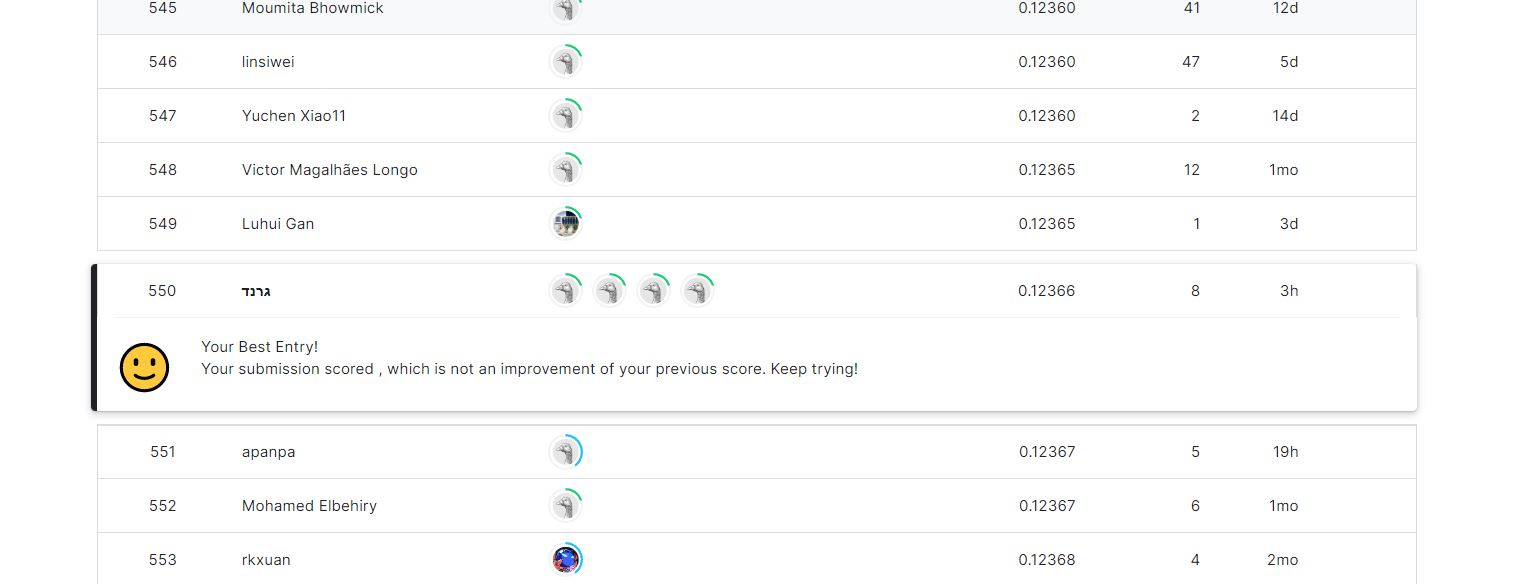

In [78]:
from IPython.display import Image
Image("/kaggle/input/leaderboard/leaderboard.JPG")

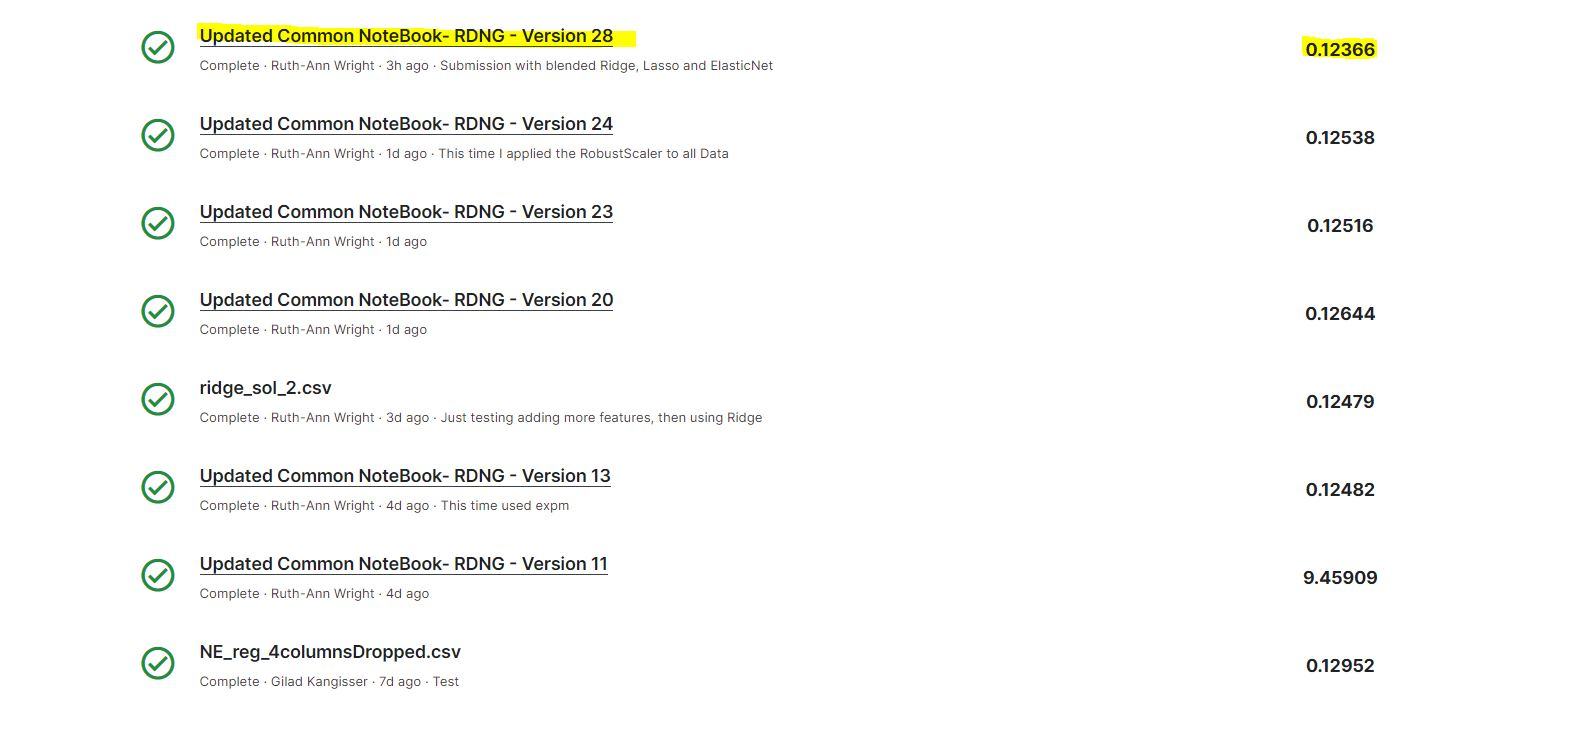

In [79]:
from IPython.display import Image
Image("/kaggle/input/submissions/submissions.JPG")

## References 
In addition to the hyperlinks in the documents
https://towardsdatascience.com/linear-regression-analysis-on-house-price-in-python-55bbe2cd3fd9
https://towardsdatascience.com/linear-regression-model-with-python-481c89f0f05b
https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
https://www.kaggle.com/code/sorkun/house-prices-feature-engineering-lb-0-11775/notebook
https://www.kaggle.com/code/sorkun/house-prices-feature-engineering-lb-0-11775/notebook 